# Introduction

In 2011, just over 16,000 battery and plug-in hybrid electric vehicles had been sold in the US. As of December 2020, that number had grown a hundred-fold to nearly 1.7 million vehicles. By mid-2021, cumulative plug-in electric vehicle sales had surpassed 2 million.[1] The craze of Electric Vehicles in USA is evident.

An electric vehicle with no tailpipe emissions, removes a wide range of contaminants—from nitrogen oxides to fine particulate matter—from the near-road environment and shifts them to power plants. The net effect remains a large improvement in air quality.[2]
As the advantages of owning an EV increase, there is an increased demand for EV Charging Stations across the country. The widespread adoption of EVs will require a robust network of charging stations, from home-based AC charging to DC powered extreme fast charging. [3] 

The U.S. government owns about 1,100 charging stations. It may need more than 100,000 charging stations to support widespread EV use in the next decade. [5] To meet this need, the US government is ready to set out funds. [6]  States are getting the go-ahead to build a nationwide network of electric vehicle charging stations that would place new or upgraded stations every 50 miles along interstate highways.[8]

Through this project, we aim to analyze the data of EV charging stations present in several locations in the states of USA and be able to draw insights from it. Being able to locate which parts of the country need modifications in terms of the number of stations can help the cause of creating smarter transportation in smart cities.

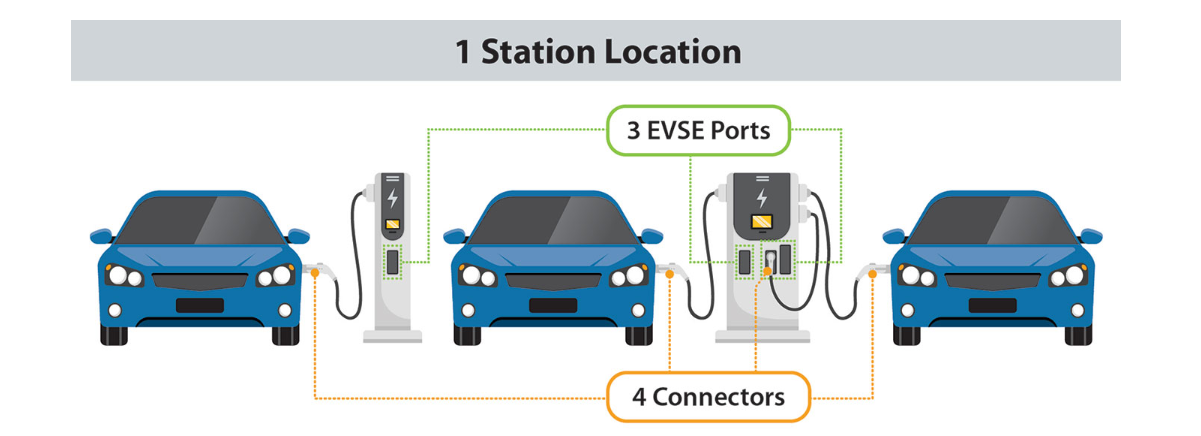


**Citations :**

1.	https://electrek.co/2021/11/09/the-number-of-us-electric-vehicles-grows-from-16k-to-2-million-in-10-years/
2.	https://evcharging.enelx.com/resources/blog/655-8-ways-ev-charging-can-have-a-positive-impact-on-your-community
3.	https://afdc.energy.gov/fuels/electricity_research.html
4.	https://afdc.energy.gov/fuels/electricity_infrastructure.html
5.	https://techcrunch.com/2022/04/05/the-us-government-has-just-1-of-the-ev-chargers-it-needs/
6.	https://www.nbcnews.com/news/us-news/us-provide-5-billion-help-states-build-network-ev-charging-stations-rcna16159
7.	https://www.reuters.com/world/us/five-facts-state-us-electric-vehicle-charging-network-2021-09-01/
8.	https://www.usnews.com/news/business/articles/2022-02-10/states-get-go-ahead-to-build-electric-car-charging-stations
9.	Amara-Ouali, Y.; Goude, Y.; Massart, P.; Poggi, Je.; Yan, H. A Review of Electric Vehicle Load Open Data and Models. Energies 2021, 14, 2233. https://doi.org/10.3390/ en14082233 https://www.researchgate.net/publication/350934605_A_Review_of_Electric_Vehicle_Load_Open_Data_and_Models
10.	https://www.reuters.com/business/autos-transportation/us-government-may-need-more-than-100000-charging-stations-testimony-2022-04-05/


# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
# import modules we need for EDA and wrangling


# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, median_absolute_error


# regression spot check models!
from sklearn.linear_model import SGDRegressor, Lasso, ElasticNet
from sklearn.cross_decomposition import PLSRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
# these functions are useful for splitting and normalization
from sklearn.preprocessing import  MinMaxScaler
from sklearn.model_selection import train_test_split

# import other functions we'll need for regression modeling
from sklearn.linear_model import LinearRegression # LR
from sklearn.tree import DecisionTreeRegressor # DTR
from sklearn.ensemble import RandomForestRegressor # RFR
from sklearn.ensemble import GradientBoostingRegressor #GBR

# regression error metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# permutation testing
from sklearn.inspection import permutation_importance

## Main Dataset

In [ ]:
# https://drive.google.com/file/d/1VhNGyRVUc5rWAJGnT2OOXuAyqVN7Yo7b/view?usp=sharing
!gdown --id 1VhNGyRVUc5rWAJGnT2OOXuAyqVN7Yo7b

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1VhNGyRVUc5rWAJGnT2OOXuAyqVN7Yo7b
To: /content/chargingStations.csv
100% 18.7M/18.7M [00:00<00:00, 275MB/s]


In [ ]:
df=pd.read_csv('/content/chargingStations.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,10,14,15,16,20,31,33,34,35,36,43,46,49,52,53,57,58,59,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df.head()

Fuel Type Code                                       Station Name  \
0            CNG               Spire - Montgomery Operations Center   
1            CNG                                PS Energy - Atlanta   
2            CNG       Metropolitan Atlanta Rapid Transit Authority   
3            CNG                              United Parcel Service   
4            CNG  Clean Energy - Texas Department of Transportation   

         Street Address                            Intersection Directions  \
0      2951 Chestnut St                                                NaN   
1      340 Whitehall St  From I-7585 N, exit 91 to Central Ave, left on...   
2   2424 Piedmont Rd NE                                                NaN   
3  270 Marvin Miller Dr                                                NaN   
4   7721A Washington St  I-10, Washington Ave exit, 1.5 blocks to the s...   

         City State    ZIP  Plus4 Station Phone Status Code  ...  \
0  Montgomery    AL  36107    NaN           NaN           E  ...   
1     Atlanta    GA  30303    NaN  770-350-3000           E  ...   
2     Atlanta    GA  30324    NaN           NaN           E  ...   
3     Atlanta    GA  30336    NaN           NaN           E  ...   
4     Houston    TX  77007    NaN  866-809-4869           E  ...   

  EV Pricing (French) LPG Nozzle Types Hydrogen Pressures Hydrogen Standards  \
0                 NaN              NaN                NaN                NaN   
1                 NaN              NaN                NaN                NaN   
2                 NaN              NaN                NaN                NaN   
3                 NaN              NaN                NaN                NaN   
4                 NaN              NaN                NaN                NaN   

  CNG Fill Type Code    CNG PSI CNG Vehicle Class  LNG Vehicle Class  \
0                  B       3600                MD                NaN   
1                  Q       3600                MD                NaN   
2                  Q       3000                LD                NaN   
3                  B       3600                HD                NaN   
4                  Q  3000 3600                MD                NaN   

   EV On-Site Renewable Source  Restricted Access  
0                          NaN                NaN  
1                          NaN                NaN  
2                          NaN                NaN  
3                          NaN                NaN  
4                          NaN                NaN  

[5 rows x 65 columns]

In [ ]:
print(df.shape)

(57552, 65)


## Preprocessing the data

Function to get the Missing values from a dataframe

In [ ]:
def get_nulls(df):
  nulls=df.isna().sum().reset_index().sort_values(by=0,ascending=False)
  k=nulls.loc[nulls[0]>0]
  return k

### Handling the ZIP Code column

In [ ]:
df.loc[df['State']=='ON','ZIP']

56260    L2G3X
Name: ZIP, dtype: object

As we can see that the ZIP code format above belongs to Canada which is very much different from US format. So, we can drop this row.

In [ ]:
inds=df.loc[df['ZIP']=='L2G3X'].index
df.drop(index=inds,inplace=True)

Some of the ZIP codes have less than 5 digits. So, we need to append 0's in the beginning. That can be done by using the **zfill()**.

1. Convert it to str
2. Then, use the zfill function

In [ ]:
df['ZIP']=df['ZIP'].astype('str')
df['ZIP']=df['ZIP'].apply(lambda x: x.zfill(5))

In [ ]:
df.loc[df['Fuel Type Code']=="ELEC",'ZIP'].nunique()

9199

### Removing the columns with French

In [ ]:
french_cols=df.columns[df.columns.str.contains('French')]
french_cols

Index(['Intersection Directions (French)', 'Access Days Time (French)',
       'BD Blends (French)', 'Groups With Access Code (French)',
       'EV Pricing (French)'],
      dtype='object')

In [ ]:
df.drop(columns=french_cols,inplace=True)

### Handling the EV Pricing column

In [ ]:
df.loc[df['EV Pricing']=='FREE','EV Pricing']='Free'

In [ ]:
df['EV Pricing'].value_counts()

Free                                                                                  10144
$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW      862
Level 2: $0.49 per kWh                                                                  785
Level 2: $0.59 per kWh                                                                  300
$2.00/Hr Parking Fee                                                                    204
                                                                                      ...  
$0.55-$15.00/Hr Variable Parking Fee                                                      1
$0.00-$1.50/Hr Variable Parking Fee, $0.15/kWh Energy Fee                                 1
$0.35/Hr Parking Fee                                                                      1
$0.00-$0.75/Hr Variable Parking Fee                                                       1
$0.00-$5.00/Hr Variable Parking Fee, $0.00-$0.40/kWh Variable Energy Fee        

#### FREE == Free
There are two values with Free and FREE. First merge them.

In [ ]:
df['EV Pricing'].value_counts()

Free                                                                                  10144
$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW      862
Level 2: $0.49 per kWh                                                                  785
Level 2: $0.59 per kWh                                                                  300
$2.00/Hr Parking Fee                                                                    204
                                                                                      ...  
$0.55-$15.00/Hr Variable Parking Fee                                                      1
$0.00-$1.50/Hr Variable Parking Fee, $0.15/kWh Energy Fee                                 1
$0.35/Hr Parking Fee                                                                      1
$0.00-$0.75/Hr Variable Parking Fee                                                       1
$0.00-$5.00/Hr Variable Parking Fee, $0.00-$0.40/kWh Variable Energy Fee        

#### kWh
Extract based on 'kWh'

In [ ]:
kwh=df.loc[(df['EV Pricing'].str.contains('kWh')) & (df['EV Pricing'].notna()),'EV Pricing']

In [ ]:
kk='Free for 0-30 mins; $0.30 per kWh for 30-75 mins; $1.00 per kWh after 75 mins'
re.findall('\d.\d+',kk)

['0-30', '0.30', '0-75', '1.00']

In [ ]:
kwh[kwh.str.contains('0-75')].values

array(['Free for 0-30 mins; $0.30 per kWh for 30-75 mins; $1.00 per kWh after 75 mins'],
      dtype=object)

In [ ]:
ls=[]
for i in kwh.values:
  k=re.findall('\d.\d+',i)
  if len(k)==1:
    ls.append(float(k[0]))
  elif (len(k)>1) and (float(k[1])<1):
    ls.append(float(k[1]))
  elif (len(k)>2) and (float(k[2])<1):
    ls.append(float(k[2]))
  else:
    ls.append(0)

In [ ]:
df.loc[(df['EV Pricing'].str.contains('kWh')) & (df['EV Pricing'].notna()),'EV Pricing']=ls

In [ ]:
pd.set_option('display.max_rows',10)
df['EV Pricing'].value_counts()

Free                                                        10144
0.26                                                          864
0.49                                                          793
0.59                                                          305
$2.00/Hr Parking Fee                                          204
                                                            ...  
Free; $21 per day parking fee                                   1
Pay to Park                                                     1
$0.35/Hr Parking Fee                                            1
$7 per session; Free with electric vehicle license plate        1
1.0                                                             1
Name: EV Pricing, Length: 379, dtype: int64

#### Parking Fee
Parking Fee

In [ ]:
parking=df.loc[(df['EV Pricing'].str.contains('Parking')) & (df['EV Pricing'].notna()),'EV Pricing']

In [ ]:
parking

9231                        Free; Parking fee
12261                             Parking fee
17673                             Parking fee
25009                    $1.00/Hr Parking Fee
25010     $0.00-$1.00/Hr Variable Parking Fee
                         ...                 
57184                    $1.35/Hr Parking Fee
57187     $1.00-$2.00/Hr Variable Parking Fee
57188     $2.00-$8.00/Hr Variable Parking Fee
57358    $0.00-$10.00/Hr Variable Parking Fee
57467     $0.00-$5.00/Hr Variable Parking Fee
Name: EV Pricing, Length: 879, dtype: object

In [ ]:
re.findall('\d.\d+',parking.values[-1])

['0.00', '5.00']

In [ ]:
ls=[]
for i in parking.values:
  k=re.findall('\d.\d+',i)
  if len(k)==0:
    ls.append(0)
  else:
    ls.append(k[-1])

In [ ]:
df.loc[(df['EV Pricing'].str.contains('Parking')) & (df['EV Pricing'].notna()),'EV Pricing']=ls

In [ ]:
df['EV Pricing'].value_counts()

Free                                                                                          10144
0.26                                                                                            864
0.49                                                                                            793
0.59                                                                                            305
2.00                                                                                            261
                                                                                              ...  
Level 2: Free; DC Fast: $0.08 per minute for first 30 minutes, $0.20 per minute thereafter        1
$50 refundable deposit per session                                                                1
Payment through SemaConnect                                                                       1
$15 per month                                                                                     1


#### Session

In [ ]:
session=df.loc[(df['EV Pricing'].str.contains('session')) & (df['EV Pricing'].notna()),'EV Pricing']
session

1184                                     $7 per session
2394                                    $25 per session
3471                                    $10 per session
3760                                     $3 per session
3761                                     $6 per session
                              ...                      
50037                                    $1 per session
50297                        Level 2: $9.99 per session
53373    Free for guests; $5 per session for non guests
54797                        Level 2: $9.99 per session
57372                        Level 2: $9.99 per session
Name: EV Pricing, Length: 161, dtype: object

In [ ]:
session.shape

(161,)

In [ ]:
ls=[]
for i in session.values:
  k=re.findall('\d.\d+',i)
  if len(k)==0:
    ls.append(0.0)
  else:
    ls.append(float(k[-1]))

In [ ]:
len(ls)

161

In [ ]:
min(ls),max(ls)

(0.0, 9.99)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


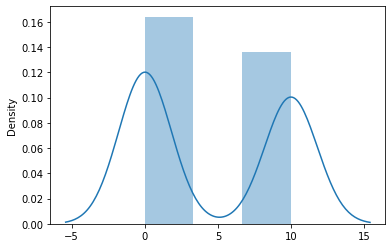

In [ ]:
sns.distplot(ls)

In [ ]:
df.loc[(df['EV Pricing'].str.contains('session')) & (df['EV Pricing'].notna()),'EV Pricing']=ls

#### Free to 0.0
Make Free stations to 0.0 

In [ ]:
df['EV Pricing'].value_counts()

Free             10144
0.26               864
0.49               793
0.59               305
2.00               261
                 ...  
$15 per month        1
$3 per month         1
$25 per hour         1
0.41                 1
1.0                  1
Name: EV Pricing, Length: 260, dtype: int64

In [ ]:
df.loc[(df['EV Pricing'].str.contains('Free')) & (df['EV Pricing'].notna()),'EV Pricing']=0.0

#### Per keyword
Extracting per keyword (per hour)

In [ ]:
per=df.loc[(df['EV Pricing'].str.contains('per')) & (df['EV Pricing'].notna()),'EV Pricing']
per

1208     $1 per hour for first two hours; $3 per hour t...
3353                            $0.75 per hour parking fee
3354                            $0.75 per hour parking fee
3355                            $0.75 per hour parking fee
3356     $1 per first and second half-hour parking fee;...
                               ...                        
57083                        Level 2: $0.03 per 30 seconds
57307                        Level 2: $0.03 per 30 seconds
57422                        Level 2: $0.03 per 30 seconds
57424                        Level 2: $0.03 per 30 seconds
57465                        Level 2: $0.03 per 30 seconds
Name: EV Pricing, Length: 582, dtype: object

In [ ]:
ls=[]
for i in per.values:
  k=re.findall('\d.\d+',i)
  if len(k)==0:
    ls.append(0.0)
  else:
    ls.append(k[0])

In [ ]:
len(ls)

582

In [ ]:
df.loc[(df['EV Pricing'].str.contains('per')) & (df['EV Pricing'].notna()),'EV Pricing']=ls

#### Remaining categories
 Remaining values

In [ ]:
remaining=df.loc[df['EV Pricing'].notna(),'EV Pricing']
remaining

165              0.0
175              0.0
181      Pay to Park
182              0.0
183              0.0
            ...     
57518            0.0
57519            0.0
57545           0.49
57546           0.59
57547            0.0
Name: EV Pricing, Length: 14433, dtype: object

In [ ]:
remaining[(remaining.str.contains('5:30')) & (remaining.notna())]

12241    5:30
Name: EV Pricing, dtype: object

In [ ]:
ls=[]
for i in remaining.values:
  k=re.findall('\d.\d*',str(i))
  if len(k)==0:
    ls.append(0.0)
  else:
    ls.append(k[0])

In [ ]:
len(ls)

14433

In [ ]:
df.loc[df['EV Pricing'].notna(),'EV Pricing']=ls

In [ ]:
df.loc[df['EV Pricing']=='5:30','EV Pricing']=5.0

#### Converting to Float

In [ ]:
df['EV Pricing']=df['EV Pricing'].astype('float64')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


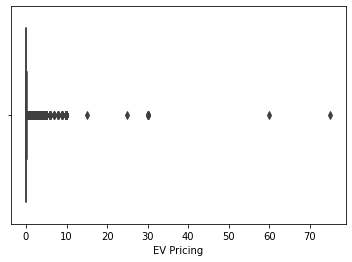

In [ ]:
sns.boxplot(df["EV Pricing"])

#### Check for Outliers

In [ ]:
df['EV Pricing'].mean()

0.30808286565509635

In [ ]:
df.loc[df['EV Pricing']>30,'EV Pricing']=df['EV Pricing'].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


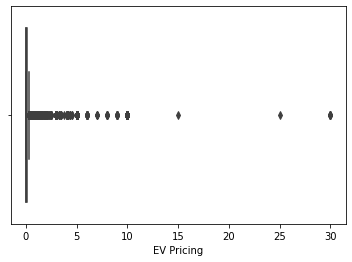

In [ ]:
sns.boxplot(df["EV Pricing"])

#### Handling the missing values

Imputing the Missing values using Forward Filling

In [ ]:
df['EV Pricing'][0]=df["EV Pricing"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#### Forward Filling the missing values

In [ ]:
df['EV Pricing']=df['EV Pricing'].fillna(method='ffill')

In [ ]:
df.columns[~df.columns.str.contains('EV')]

Index(['Fuel Type Code', 'Station Name', 'Street Address',
       'Intersection Directions', 'City', 'State', 'ZIP', 'Plus4',
       'Station Phone', 'Status Code', 'Expected Date',
       'Groups With Access Code', 'Access Days Time', 'Cards Accepted',
       'BD Blends', 'NG Fill Type Code', 'NG PSI', 'Geocode Status',
       'Latitude', 'Longitude', 'Date Last Confirmed', 'ID', 'Updated At',
       'Owner Type Code', 'Federal Agency ID', 'Federal Agency Name',
       'Open Date', 'Hydrogen Status Link', 'NG Vehicle Class', 'LPG Primary',
       'E85 Blender Pump', 'Country', 'Hydrogen Is Retail', 'Access Code',
       'Access Detail Code', 'Federal Agency Code', 'Facility Type',
       'CNG Dispenser Num', 'CNG On-Site Renewable Source',
       'CNG Total Compression Capacity', 'CNG Storage Capacity',
       'LNG On-Site Renewable Source', 'E85 Other Ethanol Blends',
       'LPG Nozzle Types', 'Hydrogen Pressures', 'Hydrogen Standards',
       'CNG Fill Type Code', 'CNG PSI', 'CNG V

### Removing the columns (Text and NON - ELEC)
Some columns which are text and has more categories and some unrelated columns such as the NON-ELEC columns can be removed

In [ ]:
df.drop(columns=['Station Name','Street Address','Intersection Directions','Plus4','Station Phone','Status Code'],inplace=True)

In [ ]:
df['Groups With Access Code'].value_counts()

Public                                                           47501
Private                                                           3917
Public - Call ahead                                               2260
Public - Credit card at all times                                 1482
Private - Government only                                         1097
                                                                 ...  
PLANNED - not yet accessible (Public - Card key at all times)        2
TEMPORARILY UNAVAILABLE (Public - Card key at all times)             2
PLANNED - not yet accessible (Private - Government only)             1
Public - Limited hours                                               1
Private - Credit card after hours                                    1
Name: Groups With Access Code, Length: 28, dtype: int64

Refer to the Access code and the access details code

In [ ]:
df['Access Code'].value_counts()

public     52373
private     5178
Name: Access Code, dtype: int64

In [ ]:
df["Access Detail Code"].value_counts()

CALL                       2281
CREDIT_CARD_ALWAYS         1597
GOVERNMENT                 1103
CREDIT_CARD_AFTER_HOURS     525
KEY_ALWAYS                  210
FLEET                        94
KEY_AFTER_HOURS              57
LIMITED_HOURS                 1
Name: Access Detail Code, dtype: int64

There is not much information needed from the access detail code. Only whether It is public or private is enough

In [ ]:
df.drop(columns=['Access Detail Code'],inplace=True)

In [ ]:
df.drop(columns=['Groups With Access Code'],inplace=True)

In [ ]:
df.columns

Index(['Fuel Type Code', 'City', 'State', 'ZIP', 'Expected Date',
       'Access Days Time', 'Cards Accepted', 'BD Blends', 'NG Fill Type Code',
       'NG PSI', 'EV Level1 EVSE Num', 'EV Level2 EVSE Num',
       'EV DC Fast Count', 'EV Other Info', 'EV Network', 'EV Network Web',
       'Geocode Status', 'Latitude', 'Longitude', 'Date Last Confirmed', 'ID',
       'Updated At', 'Owner Type Code', 'Federal Agency ID',
       'Federal Agency Name', 'Open Date', 'Hydrogen Status Link',
       'NG Vehicle Class', 'LPG Primary', 'E85 Blender Pump',
       'EV Connector Types', 'Country', 'Hydrogen Is Retail', 'Access Code',
       'Federal Agency Code', 'Facility Type', 'CNG Dispenser Num',
       'CNG On-Site Renewable Source', 'CNG Total Compression Capacity',
       'CNG Storage Capacity', 'LNG On-Site Renewable Source',
       'E85 Other Ethanol Blends', 'EV Pricing', 'LPG Nozzle Types',
       'Hydrogen Pressures', 'Hydrogen Standards', 'CNG Fill Type Code',
       'CNG PSI', 'CNG Veh

### Removing the ID columns and the Agency names and the Date columns

In [ ]:
df.drop(columns=['Expected Date','Cards Accepted','Geocode Status','Latitude','Longitude','Date Last Confirmed',
                 'ID','Updated At','Federal Agency ID','Federal Agency Name','Open Date','Country',
                 'Federal Agency Code'],inplace=True)

These are the columns which has the ID's and the irrelevnt columns that doesn't help the model in performing better.

In [ ]:
df["Restricted Access"].value_counts()

Series([], Name: Restricted Access, dtype: int64)

As this column has the 100% missing data which can be excluded from the analysis

In [ ]:
df.drop(columns=["Restricted Access"],inplace=True)

In [ ]:
df.head()

Fuel Type Code        City State    ZIP  \
0            CNG  Montgomery    AL  36107   
1            CNG     Atlanta    GA  30303   
2            CNG     Atlanta    GA  30324   
3            CNG     Atlanta    GA  30336   
4            CNG     Houston    TX  77007   

                                    Access Days Time BD Blends  \
0                                                NaN       NaN   
1                                     24 hours daily       NaN   
2                                                NaN       NaN   
3                                                NaN       NaN   
4  24 hours daily; call 866-809-4869 for Clean En...       NaN   

  NG Fill Type Code     NG PSI  EV Level1 EVSE Num  EV Level2 EVSE Num  ...  \
0                 B       3600                 NaN                 NaN  ...   
1                 Q       3600                 NaN                 NaN  ...   
2                 Q       3000                 NaN                 NaN  ...   
3                 B       3600                 NaN                 NaN  ...   
4                 Q  3000 3600                 NaN                 NaN  ...   

   E85 Other Ethanol Blends EV Pricing LPG Nozzle Types Hydrogen Pressures  \
0                       NaN   0.298772              NaN                NaN   
1                       NaN   0.298772              NaN                NaN   
2                       NaN   0.298772              NaN                NaN   
3                       NaN   0.298772              NaN                NaN   
4                       NaN   0.298772              NaN                NaN   

  Hydrogen Standards CNG Fill Type Code    CNG PSI CNG Vehicle Class  \
0                NaN                  B       3600                MD   
1                NaN                  Q       3600                MD   
2                NaN                  Q       3000                LD   
3                NaN                  B       3600                HD   
4                NaN                  Q  3000 3600                MD   

  LNG Vehicle Class EV On-Site Renewable Source  
0               NaN                         NaN  
1               NaN                         NaN  
2               NaN                         NaN  
3               NaN                         NaN  
4               NaN                         NaN  

[5 rows x 38 columns]

Start by considering the EV specific columns which are very important for the analysis which we are going to predict.

### EV Level1 EVSE Num

In [ ]:
ev_cols=df.columns[df.columns.str.contains('EV')]
ev_cols

Index(['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count',
       'EV Other Info', 'EV Network', 'EV Network Web', 'EV Connector Types',
       'EV Pricing', 'EV On-Site Renewable Source'],
      dtype='object')

Impute the missing values based on the State

In [ ]:
d=dict()
for i in df['State'].unique():
  k=df.loc[df['State']==i,'EV Level1 EVSE Num'].count()
  d[i]=k

In [ ]:
for i in df['State'].unique():
  df.loc[(df['EV Level1 EVSE Num'].isna()) & (df['Fuel Type Code']=='ELEC') & (df['State']==i),'EV Level1 EVSE Num']=d[i]

For Non-ELEC ones, try to impute 0's which is considered as the NON-ELEC stations.

In [ ]:
df.loc[(df['EV Level1 EVSE Num'].isna()) & (df['Fuel Type Code']!='ELEC'),'EV Level1 EVSE Num']=0

### EV Level2 EVSE Num

Same as above for before. Just imputing the missing values by the number of ports based on the State which is the right one instead of the mean and the median value of imputation 

In [ ]:
d=dict()
for i in df['State'].unique():
  k=df.loc[df['State']==i,'EV Level2 EVSE Num'].count()
  d[i]=k

In [ ]:
for i in df['State'].unique():
  df.loc[(df['EV Level2 EVSE Num'].isna()) & (df['Fuel Type Code']=='ELEC') & (df['State']==i),'EV Level2 EVSE Num']=d[i]

In [ ]:
df.loc[(df['EV Level2 EVSE Num'].isna()) & (df['Fuel Type Code']!='ELEC'),'EV Level2 EVSE Num']=0

In [ ]:
get_nulls(df)

index      0
11                 EV Other Info  57515
27  LNG On-Site Renewable Source  57506
15          Hydrogen Status Link  57466
32            Hydrogen Standards  57420
20            Hydrogen Is Retail  57415
..                           ...    ...
14               Owner Type Code  31896
13                EV Network Web  17873
19            EV Connector Types   9712
12                    EV Network   9698
4               Access Days Time   3561

[30 rows x 2 columns]

### EV Other Info

In [ ]:
df['EV Other Info'].value_counts()

1 SP Inductive                                                            20
1 LP Inductive                                                             4
1 LP Inductive  1 SP Inductive  1 Avcon Conductive  1 Other Conductive     1
2 Conductive 240V                                                          1
3 SP Inductive                                                             1
                                                                          ..
2 Tesla Conductive                                                         1
1 Tesla Conductive                                                         1
1 Conductive 120V                                                          1
7 Conductive 120V                                                          1
2 Conductive 120V  1 Conductive 240V                                       1
Name: EV Other Info, Length: 14, dtype: int64

As there are many values possible for the EV's, we can reduce it to two different values.
1. SP inductive (Small Paddle Inductive)
2. LP inductive (Large Paddle Inductive)

In [ ]:
df.loc[df['EV Other Info']=='2 SP Inductive','EV Other Info']='SP Inductive'
df.loc[df['EV Other Info']=='1 SP Inductive','EV Other Info']='SP Inductive'
df.loc[df['EV Other Info']=='3 SP Inductive','EV Other Info']='SP Inductive'
df.loc[df['EV Other Info']=='1 SP Inductive  1 Tesla Conductive','EV Other Info']='SP Inductive'
df.loc[df['EV Other Info']=='2 SP Inductive  1 Avcon Conductive  1 Tesla Conductive','EV Other Info']='SP Inductive'

In [ ]:
df.loc[df['EV Other Info']=='1 LP Inductive','EV Other Info']='LP Inductive'
df.loc[df['EV Other Info']=='1 LP Inductive  1 SP Inductive  1 Avcon Conductive  1 Other Conductive','EV Other Info']='LP Inductive'


In [ ]:
get_nulls(df)

index      0
11                 EV Other Info  57515
27  LNG On-Site Renewable Source  57506
15          Hydrogen Status Link  57466
32            Hydrogen Standards  57420
20            Hydrogen Is Retail  57415
..                           ...    ...
14               Owner Type Code  31896
13                EV Network Web  17873
19            EV Connector Types   9712
12                    EV Network   9698
4               Access Days Time   3561

[30 rows x 2 columns]

Even though I reduce the number of categories, it is very difficult to fill the missing values which are more than 95%.

### Dropping the EV Other Info columns

In [ ]:
df.drop(columns=['EV Other Info'],inplace=True)

In [ ]:
pd.set_option('display.max_rows',30)
null_columns=get_nulls(df)

If the Missing rows are more than 85% then it is better to remove them.
If we impute them, there occurs data redundency and force feeding the model in going in a wrong way

Removing the columns with null values > $40000$

In [ ]:
cols_to_be_removed=null_columns.loc[null_columns[0]>40000,'index'].values

In [ ]:
cols_to_be_removed

array(['LNG On-Site Renewable Source', 'Hydrogen Status Link',
       'Hydrogen Standards', 'Hydrogen Is Retail', 'Hydrogen Pressures',
       'LNG Vehicle Class', 'CNG Storage Capacity',
       'EV On-Site Renewable Source', 'CNG On-Site Renewable Source',
       'CNG Total Compression Capacity', 'BD Blends',
       'E85 Other Ethanol Blends', 'CNG Dispenser Num', 'CNG PSI',
       'NG PSI', 'CNG Fill Type Code', 'NG Fill Type Code',
       'CNG Vehicle Class', 'NG Vehicle Class', 'LPG Nozzle Types',
       'LPG Primary', 'E85 Blender Pump', 'EV DC Fast Count'],
      dtype=object)

In [ ]:
df.drop(columns=cols_to_be_removed,inplace=True)

In [ ]:
get_nulls(df)

index      0
12       Facility Type  33615
9      Owner Type Code  31896
8       EV Network Web  17873
10  EV Connector Types   9712
7           EV Network   9698
4     Access Days Time   3561

In [ ]:
df.shape

(57551, 14)

In [ ]:
df['Facility Type'].value_counts()

CONVENIENCE_STORE    4231
HOTEL                2508
CAR_DEALER           2381
FUEL_RESELLER        1234
MUNI_GOV             1038
                     ... 
STORAGE                 9
STADIUM                 7
MOTOR_POOL              5
PHARMACY                1
RETAIL                  1
Name: Facility Type, Length: 60, dtype: int64

It doesn't matter whether the location of the station is. And, there are 60 categories which is difficult to handle.

In [ ]:
df.drop(columns=['Facility Type'],inplace=True)

In [ ]:
df.drop(columns=['Owner Type Code'],inplace=True)

In [ ]:
get_nulls(df)

index      0
8      EV Network Web  17873
9  EV Connector Types   9712
7          EV Network   9698
4    Access Days Time   3561

In [ ]:
df['Access Days Time'].value_counts()

24 hours daily                                                                                                                         34866
24 hours daily; for customer use only; see front desk for access                                                                        2173
MON: 24 hours | TUE: 24 hours | WED: 24 hours | THU: 24 hours | FRI: 24 hours | SAT: 24 hours | SUN: 24 hours                           1560
MO: Not Specified; TU: Not Specified; WE: Not Specified; TH: Not Specified; FR: Not Specified; SA: Not Specified; SU: Not Specified     1417
Dealership business hours                                                                                                               1176
                                                                                                                                       ...  
24 hours daily; permit required; maximum session time of 4 hours                                                                           1
24 hours dail

As there are a high number of categories, it is better to remove the columns instead of recoding them

In [ ]:
df.drop(columns=['Access Days Time'],inplace=True)

In [ ]:
get_nulls(df)

index      0
7      EV Network Web  17873
8  EV Connector Types   9712
6          EV Network   9698

### Recoding the EV Connector Types

In [ ]:
df['EV Connector Types'].value_counts()

J1772                               36745
TESLA                                3206
CHADEMO J1772COMBO                   2739
J1772 TESLA                          2522
CHADEMO J1772 J1772COMBO              626
CHADEMO J1772                         413
J1772COMBO                            379
J1772 NEMA515                         343
NEMA520                               244
NEMA515                               217
CHADEMO                               149
J1772 NEMA520                         108
J1772 J1772COMBO                       81
NEMA1450                               24
J1772 NEMA1450                         23
CHADEMO J1772 J1772COMBO TESLA          5
J1772COMBO NEMA520                      2
CHADEMO J1772COMBO TESLA                2
CHADEMO J1772 NEMA520 TESLA             1
CHADEMO J1772COMBO NEMA520              1
CHADEMO J1772 NEMA515                   1
CHADEMO NEMA520                         1
J1772 J1772COMBO NEMA520                1
J1772 NEMA515 NEMA520             

As there are high number of categories, it is difficult to recode them. But, can be included in the analysis by recoding all the EV rows to 1 and the rest to 0's. It is like a switch for EV.

In [ ]:
df.loc[(df['Fuel Type Code']=='ELEC'),'EV Connector Types']=1
df.loc[(df['Fuel Type Code']!='ELEC'),'EV Connector Types']=0

In [ ]:
df['EV Connector Types'].value_counts()

1    47859
0     9692
Name: EV Connector Types, dtype: int64

### Recoding the EV Network and the EV Network Web column

In [ ]:
df.loc[(df['Fuel Type Code']=='ELEC'),'EV Network']=1
df.loc[(df['Fuel Type Code']!='ELEC'),'EV Network']=0
df.loc[(df['Fuel Type Code']=='ELEC'),'EV Network Web']=1
df.loc[(df['Fuel Type Code']!='ELEC'),'EV Network Web']=0

In [ ]:
get_nulls(df)

Empty DataFrame
Columns: [index, 0]
Index: []

In [ ]:
df.shape

(57551, 11)

## Zip code Data

### Loading the Data

In [ ]:
zips=pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data')

In [ ]:
zips.head()

ZIP        LAT        LNG
0  601  18.180555 -66.749961
1  602  18.361945 -67.175597
2  603  18.455183 -67.119887
3  606  18.158345 -66.932911
4  610  18.295366 -67.125135

### Handling the zip code column 

In [ ]:
zips['ZIP']=zips['ZIP'].astype('str')
zips['ZIP']=zips['ZIP'].apply(lambda x: x.zfill(5))
#zips['ZIP']=zips['ZIP'].astype('object')

### Check for the Missing values

In [ ]:
zips.isna().sum()

ZIP    0
LAT    0
LNG    0
dtype: int64

### Merging the Original DataFrame with the ZIP code Data

In [ ]:
final_df=pd.merge(df,zips,on='ZIP',how='right')

In [ ]:
final_df.shape

(78768, 13)

In [ ]:
final_df['ZIP'].nunique()

33144

In [ ]:
get_nulls(final_df)

index      0
0       Fuel Type Code  21909
1                 City  21909
2                State  21909
4   EV Level1 EVSE Num  21909
5   EV Level2 EVSE Num  21909
6           EV Network  21909
7       EV Network Web  21909
8   EV Connector Types  21909
9          Access Code  21909
10          EV Pricing  21909

In [ ]:
final_df.loc[(final_df['Fuel Type Code'].isna())]

Fuel Type Code City State    ZIP  EV Level1 EVSE Num  \
0                NaN  NaN   NaN  00601                 NaN   
1                NaN  NaN   NaN  00602                 NaN   
2                NaN  NaN   NaN  00603                 NaN   
3                NaN  NaN   NaN  00606                 NaN   
4                NaN  NaN   NaN  00610                 NaN   
...              ...  ...   ...    ...                 ...   
78762            NaN  NaN   NaN  99922                 NaN   
78763            NaN  NaN   NaN  99923                 NaN   
78764            NaN  NaN   NaN  99925                 NaN   
78765            NaN  NaN   NaN  99926                 NaN   
78766            NaN  NaN   NaN  99927                 NaN   

       EV Level2 EVSE Num EV Network EV Network Web EV Connector Types  \
0                     NaN        NaN            NaN                NaN   
1                     NaN        NaN            NaN                NaN   
2                     NaN        NaN            NaN                NaN   
3                     NaN        NaN            NaN                NaN   
4                     NaN        NaN            NaN                NaN   
...                   ...        ...            ...                ...   
78762                 NaN        NaN            NaN                NaN   
78763                 NaN        NaN            NaN                NaN   
78764                 NaN        NaN            NaN                NaN   
78765                 NaN        NaN            NaN                NaN   
78766                 NaN        NaN            NaN                NaN   

      Access Code  EV Pricing        LAT         LNG  
0             NaN         NaN  18.180555  -66.749961  
1             NaN         NaN  18.361945  -67.175597  
2             NaN         NaN  18.455183  -67.119887  
3             NaN         NaN  18.158345  -66.932911  
4             NaN         NaN  18.295366  -67.125135  
...           ...         ...        ...         ...  
78762         NaN         NaN  55.307528 -133.046815  
78763         NaN         NaN  56.002315 -130.041026  
78764         NaN         NaN  55.550204 -132.945933  
78765         NaN         NaN  55.138352 -131.470424  
78766         NaN         NaN  56.239062 -133.457924  

[21909 rows x 13 columns]

### Handling the City and the State columns

In [ ]:
final_df.loc[final_df['State'].isna(),['State','ZIP','City']]

State    ZIP City
0       NaN  00601  NaN
1       NaN  00602  NaN
2       NaN  00603  NaN
3       NaN  00606  NaN
4       NaN  00610  NaN
...     ...    ...  ...
78762   NaN  99922  NaN
78763   NaN  99923  NaN
78764   NaN  99925  NaN
78765   NaN  99926  NaN
78766   NaN  99927  NaN

[21909 rows x 3 columns]

In [ ]:
final_df.shape

(78768, 13)

In [ ]:
get_nulls(final_df)

index      0
0       Fuel Type Code  21909
1                 City  21909
2                State  21909
4   EV Level1 EVSE Num  21909
5   EV Level2 EVSE Num  21909
6           EV Network  21909
7       EV Network Web  21909
8   EV Connector Types  21909
9          Access Code  21909
10          EV Pricing  21909

### Extracting data to fill in the State and the City names based on ZIP Code

In [ ]:
# !gdown --id 1pcGwb7HJc9IvmZcbTToyuiagGRImmlw-

In [ ]:
# d1=pd.read_csv('/content/zip_code_database.csv')
# d1.head()

In [ ]:
# d1['zip']=d1['zip'].astype('str')
# d1['zip']=d1['zip'].apply(lambda x: x.zfill(5))
# zips['ZIP']=zips['ZIP'].astype('object')

In [ ]:
# null_zips=final_df.loc[final_df['State'].isna(),'ZIP']
# null_zips

In [ ]:
# sts={}
# cts={}
# for i in null_zips:
#   st=d1.loc[d1['zip']==i,'state'].values[0]
#   city=d1.loc[d1['zip']==i,'primary_city'].values[0]
#   sts[i]=st
#   cts[i]=city

This below code around 15 minutes to execute as it has to search for the value throughout the dictionary

In [ ]:
# for i in null_zips.values:
#   final_df.loc[(final_df['State'].isna()) & (final_df['ZIP']==i),'State']=sts[i]
#   final_df.loc[(final_df['City'].isna()) & (final_df['ZIP']==i),'City']=cts[i]

In [ ]:
# get_nulls(final_df)

In [ ]:
#final_df.to_csv('final_df.csv',index=False)

In [ ]:
#https://drive.google.com/file/d/11bgPiYg84zdqk-M-xmdv8i0CBDrZsLA4/view?usp=sharing

!gdown --id 11bgPiYg84zdqk-M-xmdv8i0CBDrZsLA4

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=11bgPiYg84zdqk-M-xmdv8i0CBDrZsLA4
To: /content/final_df.csv
100% 5.74M/5.74M [00:00<00:00, 116MB/s]


In [ ]:
final_df=pd.read_csv('/content/final_df.csv')
final_df.head()

Fuel Type Code       City State  ZIP  EV Level1 EVSE Num  \
0       NON-ELEC   Adjuntas    PR  601                20.0   
1       NON-ELEC     Aguada    PR  602                20.0   
2       NON-ELEC  Aguadilla    PR  603                20.0   
3       NON-ELEC    Maricao    PR  606                20.0   
4       NON-ELEC     Anasco    PR  610                20.0   

   EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                 2.0           1               1                   1   
1                 2.0           1               1                   1   
2                 2.0           1               1                   1   
3                 2.0           1               1                   1   
4                 2.0           1               1                   1   

  Access Code  EV Pricing        LAT        LNG  
0      public         0.0  18.180555 -66.749961  
1      public         0.0  18.361945 -67.175597  
2      public         0.0  18.455183 -67.119887  
3      public         0.0  18.158345 -66.932911  
4      public         0.0  18.295366 -67.125135

In [ ]:
final_df.loc[final_df['Fuel Type Code']!='ELEC','Fuel Type Code']='NON-ELEC'

In [ ]:
final_df.loc[(final_df['Fuel Type Code'].notna()) & (final_df['Fuel Type Code']!='ELEC'),'Fuel Type Code']='NON-ELEC'

In [ ]:
final_df.loc[(final_df['Fuel Type Code'].isna()),'Fuel Type Code']='NON-ELEC'

In [ ]:
final_df.loc[final_df['EV Pricing'].isna(),'EV Pricing']=0.0

In [ ]:
final_df['EV Level1 EVSE Num'].median()
final_df['EV Level2 EVSE Num'].median()

2.0

In [ ]:
final_df.loc[final_df['EV Level1 EVSE Num'].isna(),'EV Level1 EVSE Num']=final_df['EV Level1 EVSE Num'].median()
final_df.loc[final_df['EV Level2 EVSE Num'].isna(),'EV Level2 EVSE Num']=final_df['EV Level2 EVSE Num'].median()

In [ ]:
final_df['EV Network'].value_counts()

1    69154
0     9614
Name: EV Network, dtype: int64

In [ ]:
final_df['EV Network'].mode()[0]

1

In [ ]:
final_df.loc[final_df['EV Network'].isna(),'EV Network']=final_df['EV Network'].mode()[0]
final_df.loc[final_df['EV Network Web'].isna(),'EV Network Web']=final_df['EV Network Web'].mode()[0]
final_df.loc[final_df['EV Connector Types'].isna(),'EV Connector Types']=final_df['EV Connector Types'].mode()[0]

In [ ]:
final_df['Access Code'].mode()[0]

'public'

In [ ]:
final_df.loc[final_df['Access Code'].isna(),'Access Code']=final_df['Access Code'].mode()[0]

In [ ]:
final_df.head()

Fuel Type Code       City State  ZIP  EV Level1 EVSE Num  \
0       NON-ELEC   Adjuntas    PR  601                20.0   
1       NON-ELEC     Aguada    PR  602                20.0   
2       NON-ELEC  Aguadilla    PR  603                20.0   
3       NON-ELEC    Maricao    PR  606                20.0   
4       NON-ELEC     Anasco    PR  610                20.0   

   EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                 2.0           1               1                   1   
1                 2.0           1               1                   1   
2                 2.0           1               1                   1   
3                 2.0           1               1                   1   
4                 2.0           1               1                   1   

  Access Code  EV Pricing        LAT        LNG  
0      public         0.0  18.180555 -66.749961  
1      public         0.0  18.361945 -67.175597  
2      public         0.0  18.455183 -67.119887  
3      public         0.0  18.158345 -66.932911  
4      public         0.0  18.295366 -67.125135

In [ ]:
final_df.head()

Fuel Type Code       City State  ZIP  EV Level1 EVSE Num  \
0       NON-ELEC   Adjuntas    PR  601                20.0   
1       NON-ELEC     Aguada    PR  602                20.0   
2       NON-ELEC  Aguadilla    PR  603                20.0   
3       NON-ELEC    Maricao    PR  606                20.0   
4       NON-ELEC     Anasco    PR  610                20.0   

   EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                 2.0           1               1                   1   
1                 2.0           1               1                   1   
2                 2.0           1               1                   1   
3                 2.0           1               1                   1   
4                 2.0           1               1                   1   

  Access Code  EV Pricing        LAT        LNG  
0      public         0.0  18.180555 -66.749961  
1      public         0.0  18.361945 -67.175597  
2      public         0.0  18.455183 -67.119887  
3      public         0.0  18.158345 -66.932911  
4      public         0.0  18.295366 -67.125135

In [ ]:
final_df['ZIP']=final_df['ZIP'].astype('str')
final_df['ZIP']=final_df['ZIP'].apply(lambda x: x.zfill(5))
#d1['zip']=d1['zip'].astype('object')

In [ ]:
get_nulls(final_df)

Empty DataFrame
Columns: [index, 0]
Index: []

#External Datasets



## Dataset-1: Jesal Makwana

https://simplemaps.com/data/us-zips

This dataset has 19 columns and  33789 rows</br>
Zip: Zip code </br>
Lat: Decimal Latitude </br>
Lng: Decimal Longitude </br>
City: Name of city </br>
State_id: State name ( 2 letter code) </br>
State_name: Full State name </br>
Zcta: TRUE if the zip code is a Zip Code Tabulation area </br>
Parent_zcta: The ZCTA that contains this zip code. Only exists if zcta is FALSE. Useful for making inferences about a zip code that is a point from the ZCTA that contains it. </br>
Population: An estimate of the zip code's population. Only exists if zcta is TRUE.</br>
Density: The estimated population per square kilometer. Only exists if zcta is TRUE.</br>
County_fips: The zip's primary county in the FIPS format.</br>
County_name: The name of the county_fips.</br>
County_weights: A JSON dictionary listing all county_fips and their weights (by population) associated with the zip code.</br>
County_names_all: The name of all counties that overlap the zip. (e.g. Maricopa|Pinal).</br>
County_fips_all: The 5-digit FIPS code for all counties that overlap the zip. (e.g. 04013|04021)</br>
Imprecise: TRUE if the lat/lng has been geolocated using the city (rare).</br>
Military: TRUE if the zip code is used by the US Military (lat/lng not available).</br>
Timezone: The city's time zone in the tz database format. (e.g. America/Los_Angeles)</br>


In [ ]:
!gdown --id 1JHS7pzOlL6ZHSaVzIbG7mr8qq5CDQ5dD

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1JHS7pzOlL6ZHSaVzIbG7mr8qq5CDQ5dD
To: /content/uszips.csv
100% 6.32M/6.32M [00:00<00:00, 110MB/s]


In [ ]:
d1=pd.read_csv('/content/uszips.csv')

In [ ]:
d1.head()

zip       lat       lng       city state_id   state_name  zcta  \
0  601  18.18027 -66.75266   Adjuntas       PR  Puerto Rico  True   
1  602  18.36075 -67.17541     Aguada       PR  Puerto Rico  True   
2  603  18.45744 -67.12225  Aguadilla       PR  Puerto Rico  True   
3  606  18.16585 -66.93716    Maricao       PR  Puerto Rico  True   
4  610  18.29110 -67.12243     Anasco       PR  Puerto Rico  True   

   parent_zcta  population  density  county_fips county_name  \
0          NaN     16773.0    100.5        72001    Adjuntas   
1          NaN     37083.0    472.1        72003      Aguada   
2          NaN     45652.0    513.2        72005   Aguadilla   
3          NaN      6231.0     54.3        72093     Maricao   
4          NaN     26502.0    275.7        72011      Añasco   

                                      county_weights  \
0                    {"72001": 98.76, "72141": 1.24}   
1                                     {"72003": 100}   
2                    {"72005": 99.76, "72099": 0.24}   
3    {"72093": 82.28, "72153": 11.67, "72121": 6.05}   
4  {"72011": 96.71, "72099": 2.81, "72083": 0.37,...   

                county_names_all          county_fips_all  imprecise  \
0                Adjuntas|Utuado              72001|72141      False   
1                         Aguada                    72003      False   
2                 Aguadilla|Moca              72005|72099      False   
3    Maricao|Yauco|Sabana Grande        72093|72153|72121      False   
4  Añasco|Moca|Las Marías|Aguada  72011|72099|72083|72003      False   

   military             timezone  
0     False  America/Puerto_Rico  
1     False  America/Puerto_Rico  
2     False  America/Puerto_Rico  
3     False  America/Puerto_Rico  
4     False  America/Puerto_Rico

In [ ]:
d1.rename(columns={'zip':'ZIP'},inplace=True)

In [ ]:
d1['ZIP']=d1['ZIP'].astype('str')
d1['ZIP']=d1['ZIP'].apply(lambda x: x.zfill(5))
#d1['zip']=d1['zip'].astype('object')

In [ ]:
d1['ZIP'].nunique()

33788

### Columns to be removed

In [ ]:
d1.drop(columns=['lat','lng','zcta','parent_zcta','county_fips','county_name','county_weights','county_names_all',
                 'county_fips_all','imprecise','military','timezone','state_name','state_id','city'],inplace=True)

In [ ]:
d1.head()

ZIP  population  density
0  00601     16773.0    100.5
1  00602     37083.0    472.1
2  00603     45652.0    513.2
3  00606      6231.0     54.3
4  00610     26502.0    275.7

In [ ]:
final_df1=pd.merge(final_df,d1,on='ZIP',how='left')

In [ ]:
final_df1['ZIP'].nunique()

33144

In [ ]:
final_df1.shape

(78768, 15)

In [ ]:
get_nulls(final_df1)

index    0
13  population  490
14     density  490

### Handling Missing values

In [ ]:
final_df1['population']=final_df1['population'].fillna(round(final_df1['population'].mean()))
final_df1['density']=final_df1['density'].fillna(round(final_df1['density'].mean()))

## Dataset-2: Ajay Kumar Raju Kalidindi

https://www.census.gov/library/reference/code-lists/ansi.html

This dataset has 5 columns and  52890 rows </br>
Zip: State Postal Code</br>
CountyName: County Name and Legal/Statistical Area Description</br>
State: State postal code</br>
STCountyFP: County FIPS Code</br>
ClassFP:  FIPS Class Code</br>


In [ ]:
# https://drive.google.com/file/d/1Z8WpoAxa8GP2wDBFB3hFq3x7LITlVUdC/view?usp=sharing
!gdown --id 1Z8WpoAxa8GP2wDBFB3hFq3x7LITlVUdC

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Z8WpoAxa8GP2wDBFB3hFq3x7LITlVUdC
To: /content/ZIP-COUNTY-FIPS_2017-06.csv
100% 1.81M/1.81M [00:00<00:00, 94.7MB/s]


In [ ]:
d2=pd.read_csv('/content/ZIP-COUNTY-FIPS_2017-06.csv')
d2.head()

ZIP      COUNTYNAME STATE  STCOUNTYFP CLASSFP
0  36003  Autauga County    AL        1001      H1
1  36006  Autauga County    AL        1001      H1
2  36067  Autauga County    AL        1001      H1
3  36066  Autauga County    AL        1001      H1
4  36703  Autauga County    AL        1001      H1

### Aggregation of columns

In [ ]:
d2=d2.groupby('ZIP').first().reset_index()

In [ ]:
d2['ZIP'].value_counts()

501      1
64114    1
64106    1
64108    1
64109    1
        ..
33082    1
33083    1
33084    1
33090    1
99929    1
Name: ZIP, Length: 39456, dtype: int64

In [ ]:
d2['ZIP'].nunique()

39456

In [ ]:
d2.shape

(39456, 5)

In [ ]:
d2.head()

ZIP           COUNTYNAME STATE  STCOUNTYFP CLASSFP
0  501       Suffolk County    NY       36103      H1
1  601   Adjuntas Municipio    PR       72001      H1
2  602     Aguada Municipio    PR       72003      H1
3  603  Aguadilla Municipio    PR       72005      H1
4  604  Aguadilla Municipio    PR       72005      H1

In [ ]:
d2['CLASSFP'].value_counts()

H1    37220
H6      946
H4      944
C7      216
H5      130
Name: CLASSFP, dtype: int64

### Dropping the columns

In [ ]:
d2.drop(columns=['COUNTYNAME','STATE','STCOUNTYFP'],inplace=True)

In [ ]:
#d4.rename(columns={'Zipcode':'ZIP'},inplace=True)
d2['ZIP']=d2['ZIP'].astype('str')
d2['ZIP']=d2['ZIP'].apply(lambda x: x.zfill(5))
#d2['ZIP']=d2['ZIP'].astype('object')
final_df2=pd.merge(final_df1,d2,on='ZIP',how='left')
#final_df1.merge(d2,on='ZIP',how='left')

In [ ]:
final_df2.shape

(78768, 16)

In [ ]:
final_df2['ZIP'].nunique()

33144

In [ ]:
get_nulls(final_df2)

index    0
15  CLASSFP  124

### Handling the Missing values

In [ ]:
final_df2['CLASSFP']=final_df2['CLASSFP'].fillna(final_df2['CLASSFP'].mode()[0])

## Dataset-3: Subhiksha Gajendira Babu

http://federalgovernmentzipcodes.us/download.html 

This dataset has 20 columns and  81832 rows.</br>
Zip Code: 5 digit Zip Code or military postal code(FPO/APO)</br>
ZipCode Type: Standard, PO BOX Only, Unique, Military(implies APO or FPO)</br>
City: USPS official city name(s)</br>
State: USPS official state, territory, or quasi-state (AA, AE, AP) abbreviation code</br>
LocationType: Primary, Acceptable,Not Acceptable</br>
Lat: Decimal Latitude, if available</br>
Long: Decimal Longitude, if available</br>
Xaxis, Yaxis, Zaxis: Decimal value of axis </br>
Location: Standard Display  (eg Phoenix, AZ ; Pago Pago, AS ; Melbourne, AU )</br>
Decommissioned: If Primary location, Yes implies historical Zipcode, No Implies current Zip Code; If not Primary, Yes implies Historical Place Name</br>
TaxReturnsFiled: Number of Individual Tax Returns Filed in 2008</br>
Estimated Population: Tax returns filed + Married filing jointly + Dependents</br>
Total wages: Total of Wages Salaries and Tips</br>




In [ ]:
# https://drive.google.com/file/d/1ZIE-UAP2q-1xH2t4z0d_vCxx7O5sUlLU/view?usp=sharing

!gdown --id 1ZIE-UAP2q-1xH2t4z0d_vCxx7O5sUlLU

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1ZIE-UAP2q-1xH2t4z0d_vCxx7O5sUlLU
To: /content/free-zipcode-database.csv
100% 13.0M/13.0M [00:00<00:00, 126MB/s]


In [ ]:
d3=pd.read_csv('/content/free-zipcode-database.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
d3.shape

(81831, 20)

In [ ]:
d3.head()

RecordNumber  Zipcode ZipCodeType                 City State  \
0             1      704    STANDARD          PARC PARQUE    PR   
1             2      704    STANDARD  PASEO COSTA DEL SUR    PR   
2             3      704    STANDARD        SECT LANAUSSE    PR   
3             4      704    STANDARD      URB EUGENE RICE    PR   
4             5      704    STANDARD         URB GONZALEZ    PR   

     LocationType    Lat   Long  Xaxis  Yaxis  Zaxis WorldRegion Country  \
0  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   
1  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   
2  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   
3  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   
4  NOT ACCEPTABLE  17.96 -66.22   0.38  -0.87    0.3         NaN      US   

              LocationText                      Location  Decommisioned  \
0          Parc Parque, PR          NA-US-PR-PARC PARQUE          False   
1  Paseo Costa Del Sur, PR  NA-US-PR-PASEO COSTA DEL SUR          False   
2        Sect Lanausse, PR        NA-US-PR-SECT LANAUSSE          False   
3      Urb Eugene Rice, PR      NA-US-PR-URB EUGENE RICE          False   
4         Urb Gonzalez, PR         NA-US-PR-URB GONZALEZ          False   

   TaxReturnsFiled  EstimatedPopulation  TotalWages Notes  
0              NaN                  NaN         NaN   NaN  
1              NaN                  NaN         NaN   NaN  
2              NaN                  NaN         NaN   NaN  
3              NaN                  NaN         NaN   NaN  
4              NaN                  NaN         NaN   NaN

### Considering important columns

In [ ]:
d3=d3[['Zipcode','Decommisioned','TotalWages','TaxReturnsFiled']]

In [ ]:
d3['Zipcode'].nunique()

42522

### Performing Aggregation

In [ ]:
d3=d3.groupby('Zipcode').mean().reset_index()

In [ ]:
d3.rename(columns={'Zipcode':'ZIP'},inplace=True)
d3['ZIP']=d3['ZIP'].astype('str')
d3['ZIP']=d3['ZIP'].apply(lambda x: x.zfill(5))
#d3['ZIP']=d3['ZIP'].astype('object')
final_df3=pd.merge(final_df2,d3,on='ZIP',how='inner')

In [ ]:
final_df3.shape

(78768, 19)

In [ ]:
get_nulls(final_df3)

index     0
17       TotalWages  8329
18  TaxReturnsFiled  7312

### Handling the Missing values

In [ ]:
final_df3['TotalWages']=final_df3['TotalWages'].fillna(final_df3['TotalWages'].mean())
final_df3['TaxReturnsFiled']=final_df3['TaxReturnsFiled'].fillna(final_df3['TaxReturnsFiled'].mean())

## Dataset-4: Jiantao Wen

https://www.huduser.gov/portal/datasets/usps_crosswalk.html </br>

This dataset has 8 columns and 172178 rows. </br>
Zip: 5 digit USPS ZIP code</br>
Tract: 11 digit unique 2000 or 2010 Census tract GEOID consisting of state FIPS + county FIPS + tract code. The decimal is implied and leading and trailing zeros have been preserved</br>
USPS_ZIP_PREF_CITY: USPS preferred city name</br>
USPS_ZIP_PREF_STATE: USPS preferred state address state.</br>
RES_RATIO: The ratio of residential addresses in the ZIP – Tract, County, or CBSA part to the total number of residential addresses in the entire ZIP</br>
BUS_RATIO: The ratio of business addresses in the ZIP – Tract, County, or CBSA part to the total number of business addresses in the entire ZIP.</br>
OTH_RATIO: The ratio of other addresses in the ZIP – Tract, County, or CBSA part to the total number of all types of addresses in the entire ZIP.</br>
TOTAL_RATIO: The ratio of all addresses in the ZIP – Tract, County, or CBSA part to the total number of all types of addresses in the entire ZIP.

In [ ]:
# https://drive.google.com/file/d/16NIsOawmeyqiB2k6Dy-cZGvQlGVgVJyM/view?usp=sharing
# https://docs.google.com/spreadsheets/d/1lyaOCY94v7baaFC0BdGoOLsASMQuW4PF/edit?usp=sharing&ouid=100874867880150317015&rtpof=true&sd=true

!gdown --id 1lyaOCY94v7baaFC0BdGoOLsASMQuW4PF

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lyaOCY94v7baaFC0BdGoOLsASMQuW4PF
To: /content/ZIP_TRACT_122021.xlsx
100% 17.4M/17.4M [00:00<00:00, 195MB/s]


In [ ]:
#d4=pd.read_csv('/content/population_by_zip_2010.csv')
d4=pd.read_excel('/content/ZIP_TRACT_122021.xlsx')

In [ ]:
d4.shape

(172177, 8)

In [ ]:
d4.head()

zip        tract usps_zip_pref_city usps_zip_pref_state  res_ratio  \
0  683  72023830102         SAN GERMAN                  PR   0.000791   
1  683  72125840700         SAN GERMAN                  PR   0.186219   
2  683  72125840400         SAN GERMAN                  PR   0.300451   
3  683  72125840600         SAN GERMAN                  PR   0.095325   
4  683  72121960300         SAN GERMAN                  PR   0.042402   

   bus_ratio  oth_ratio  tot_ratio  
0   0.001116   0.000000   0.000800  
1   0.370536   0.381643   0.201179  
2   0.187500   0.115942   0.290308  
3   0.007812   0.000000   0.088184  
4   0.002232   0.019324   0.039435

In [ ]:
d4['zip'].value_counts()

926      61
957      56
60647    53
959      53
956      49
         ..
83452     1
96104     1
24203     1
96767     1
60685     1
Name: zip, Length: 39324, dtype: int64

### Considering only important columns

In [ ]:
d4=d4[['zip','res_ratio','bus_ratio','oth_ratio','tot_ratio']]

### Aggregation of columns

In [ ]:
d4=d4.groupby(['zip']).mean().reset_index()

In [ ]:
#d4.drop_duplicates(subset=['zipcode'],inplace=True)

In [ ]:
d4.shape

(39324, 5)

In [ ]:
d4.rename(columns={'zip':'ZIP'},inplace=True)

In [ ]:
d4['ZIP']=d4['ZIP'].astype('str')
d4['ZIP']=d4['ZIP'].apply(lambda x: x.zfill(5))
#d4['ZIP']=d4['ZIP'].astype('object')

In [ ]:
final_df4=pd.merge(final_df3,d4,on='ZIP',how='left')

In [ ]:
final_df4.shape

(78768, 23)

In [ ]:
get_nulls(final_df4)

index    0
22  tot_ratio  131
21  oth_ratio  131
20  bus_ratio  131
19  res_ratio  131

### Handling Missing Values

In [ ]:
final_df4['oth_ratio']=final_df4['oth_ratio'].fillna(final_df4['oth_ratio'].mean())
final_df4['bus_ratio']=final_df4['bus_ratio'].fillna(final_df4['bus_ratio'].mean())
final_df4['res_ratio']=final_df4['res_ratio'].fillna(final_df4['res_ratio'].mean())
final_df4['tot_ratio']=final_df4['tot_ratio'].fillna(final_df4['tot_ratio'].mean())

In [ ]:
final_df4.head()

Fuel Type Code       City State    ZIP  EV Level1 EVSE Num  \
0       NON-ELEC   Adjuntas    PR  00601                20.0   
1       NON-ELEC     Aguada    PR  00602                20.0   
2       NON-ELEC  Aguadilla    PR  00603                20.0   
3       NON-ELEC    Maricao    PR  00606                20.0   
4       NON-ELEC     Anasco    PR  00610                20.0   

   EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                 2.0           1               1                   1   
1                 2.0           1               1                   1   
2                 2.0           1               1                   1   
3                 2.0           1               1                   1   
4                 2.0           1               1                   1   

  Access Code  ...  population  density  CLASSFP  Decommisioned    TotalWages  \
0      public  ...     16773.0    100.5       H1            0.0  4.489391e+08   
1      public  ...     37083.0    472.1       H1            0.0  4.489391e+08   
2      public  ...     45652.0    513.2       H1            0.0  4.489391e+08   
3      public  ...      6231.0     54.3       H1            0.0  4.489391e+08   
4      public  ...     26502.0    275.7       H1            0.0  4.489391e+08   

  TaxReturnsFiled  res_ratio  bus_ratio  oth_ratio  tot_ratio  
0     10062.99415   0.250000   0.250000   0.250000   0.250000  
1     10062.99415   0.250000   0.250000   0.250000   0.250000  
2     10062.99415   0.058824   0.058824   0.058824   0.058824  
3     10062.99415   0.500000   0.500000   0.500000   0.500000  
4     10062.99415   0.200000   0.200000   0.200000   0.200000  

[5 rows x 23 columns]

In [ ]:
final_df4['Fuel Type Code'].value_counts()

ELEC        47245
NON-ELEC    31523
Name: Fuel Type Code, dtype: int64

After merging the data, the problem of unbalanced data is almost solved.

# Recoding to solve the Classification Problem

In [ ]:
final_df4['Target']=np.where(final_df4['Fuel Type Code']=="ELEC",1,0)

In [ ]:
final_df4.head()

Fuel Type Code       City State    ZIP  EV Level1 EVSE Num  \
0       NON-ELEC   Adjuntas    PR  00601                20.0   
1       NON-ELEC     Aguada    PR  00602                20.0   
2       NON-ELEC  Aguadilla    PR  00603                20.0   
3       NON-ELEC    Maricao    PR  00606                20.0   
4       NON-ELEC     Anasco    PR  00610                20.0   

   EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                 2.0           1               1                   1   
1                 2.0           1               1                   1   
2                 2.0           1               1                   1   
3                 2.0           1               1                   1   
4                 2.0           1               1                   1   

  Access Code  ...  density  CLASSFP  Decommisioned    TotalWages  \
0      public  ...    100.5       H1            0.0  4.489391e+08   
1      public  ...    472.1       H1            0.0  4.489391e+08   
2      public  ...    513.2       H1            0.0  4.489391e+08   
3      public  ...     54.3       H1            0.0  4.489391e+08   
4      public  ...    275.7       H1            0.0  4.489391e+08   

   TaxReturnsFiled res_ratio  bus_ratio  oth_ratio  tot_ratio  Target  
0      10062.99415  0.250000   0.250000   0.250000   0.250000       0  
1      10062.99415  0.250000   0.250000   0.250000   0.250000       0  
2      10062.99415  0.058824   0.058824   0.058824   0.058824       0  
3      10062.99415  0.500000   0.500000   0.500000   0.500000       0  
4      10062.99415  0.200000   0.200000   0.200000   0.200000       0  

[5 rows x 24 columns]

# Recoding to Solve the Regression Problem

In [ ]:
final_df4['Fuel Type Code']=np.where(final_df4['Fuel Type Code']=='ELEC',1,0)

In [ ]:
final_df4['Fuel Type Code'].value_counts()

1    47245
0    31523
Name: Fuel Type Code, dtype: int64

In [ ]:
final_df4['Fuel Type Code']=final_df4['Fuel Type Code'].astype('int64')

In [ ]:
kk=final_df4.groupby('ZIP')['Fuel Type Code'].sum().reset_index().sort_values(by='Fuel Type Code',ascending=False)
kk.loc[kk['Fuel Type Code']==50]

ZIP  Fuel Type Code
31123  94704              50

In [ ]:
f=pd.merge(final_df4,kk,on='ZIP',how='left')
f

Fuel Type Code_x         City State    ZIP  EV Level1 EVSE Num  \
0                     0     Adjuntas    PR  00601                20.0   
1                     0       Aguada    PR  00602                20.0   
2                     0    Aguadilla    PR  00603                20.0   
3                     0      Maricao    PR  00606                20.0   
4                     0       Anasco    PR  00610                20.0   
...                 ...          ...   ...    ...                 ...   
78763                 0        Hyder    AK  99923                20.0   
78764                 0      Klawock    AK  99925                20.0   
78765                 0   Metlakatla    AK  99926                20.0   
78766                 0  Point Baker    AK  99927                20.0   
78767                 0     Wrangell    AK  99929                 0.0   

       EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                     2.0           1               1                   1   
1                     2.0           1               1                   1   
2                     2.0           1               1                   1   
3                     2.0           1               1                   1   
4                     2.0           1               1                   1   
...                   ...         ...             ...                 ...   
78763                 2.0           1               1                   1   
78764                 2.0           1               1                   1   
78765                 2.0           1               1                   1   
78766                 2.0           1               1                   1   
78767                 0.0           0               0                   0   

      Access Code  ...  CLASSFP  Decommisioned    TotalWages  TaxReturnsFiled  \
0          public  ...       H1            0.0  4.489391e+08      10062.99415   
1          public  ...       H1            0.0  4.489391e+08      10062.99415   
2          public  ...       H1            0.0  4.489391e+08      10062.99415   
3          public  ...       H1            0.0  4.489391e+08      10062.99415   
4          public  ...       H1            0.0  4.489391e+08      10062.99415   
...           ...  ...      ...            ...           ...              ...   
78763      public  ...       H5            0.0  4.489391e+08      10062.99415   
78764      public  ...       H5            0.0  1.123144e+07        423.00000   
78765      public  ...       H5            0.0  1.629464e+07        601.00000   
78766      public  ...       H5            0.0  4.489391e+08      10062.99415   
78767      public  ...       H1            0.0  2.817802e+07       1238.00000   

       res_ratio bus_ratio  oth_ratio  tot_ratio  Target  Fuel Type Code_y  
0       0.250000  0.250000   0.250000   0.250000       0                 0  
1       0.250000  0.250000   0.250000   0.250000       0                 0  
2       0.058824  0.058824   0.058824   0.058824       0                 0  
3       0.500000  0.500000   0.500000   0.500000       0                 0  
4       0.200000  0.200000   0.200000   0.200000       0                 0  
...          ...       ...        ...        ...     ...               ...  
78763   0.000000  0.000000   1.000000   1.000000       0                 0  
78764   1.000000  0.000000   1.000000   1.000000       0                 0  
78765   0.000000  0.000000   1.000000   1.000000       0                 0  
78766   0.000000  0.000000   1.000000   1.000000       0                 0  
78767   0.000000  0.000000   1.000000   1.000000       0                 0  

[78768 rows x 25 columns]

In [ ]:
f.loc[f['Fuel Type Code_x']==0,'Fuel Type Code_y']=0

In [ ]:
f['Fuel Type Code_x'].value_counts()

1    47245
0    31523
Name: Fuel Type Code_x, dtype: int64

In [ ]:
f['Fuel Type Code_y'].value_counts()

0     31523
2      3254
3      3063
1      2974
4      2492
      ...  
65       65
62       62
61       61
52       52
50       50
Name: Fuel Type Code_y, Length: 95, dtype: int64

In [ ]:
f.rename(columns={'Fuel Type Code_x': 'Fuel Code Type'},inplace=True)
f.rename(columns={'Fuel Type Code_y': 'Count_EV'},inplace=True)

# Visualization

In [ ]:
f.head()

Fuel Code Type       City State    ZIP  EV Level1 EVSE Num  \
0               0   Adjuntas    PR  00601                20.0   
1               0     Aguada    PR  00602                20.0   
2               0  Aguadilla    PR  00603                20.0   
3               0    Maricao    PR  00606                20.0   
4               0     Anasco    PR  00610                20.0   

   EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                 2.0           1               1                   1   
1                 2.0           1               1                   1   
2                 2.0           1               1                   1   
3                 2.0           1               1                   1   
4                 2.0           1               1                   1   

  Access Code  ...  CLASSFP  Decommisioned    TotalWages  TaxReturnsFiled  \
0      public  ...       H1            0.0  4.489391e+08      10062.99415   
1      public  ...       H1            0.0  4.489391e+08      10062.99415   
2      public  ...       H1            0.0  4.489391e+08      10062.99415   
3      public  ...       H1            0.0  4.489391e+08      10062.99415   
4      public  ...       H1            0.0  4.489391e+08      10062.99415   

   res_ratio bus_ratio  oth_ratio  tot_ratio  Target  Count_EV  
0   0.250000  0.250000   0.250000   0.250000       0         0  
1   0.250000  0.250000   0.250000   0.250000       0         0  
2   0.058824  0.058824   0.058824   0.058824       0         0  
3   0.500000  0.500000   0.500000   0.500000       0         0  
4   0.200000  0.200000   0.200000   0.200000       0         0  

[5 rows x 25 columns]

## Plot-1 

Count of Level1 ELECTRIC STATIONS per state

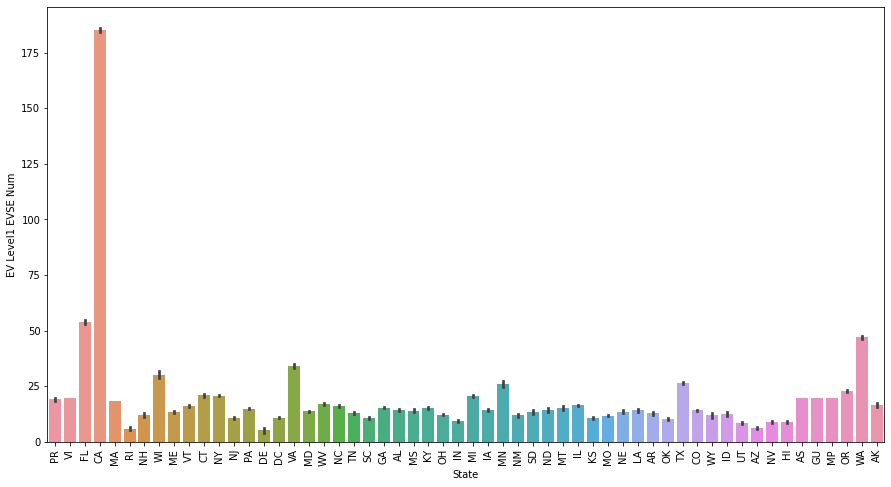

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=f,x='State',y='EV Level1 EVSE Num')
plt.xticks(rotation=90)
plt.show()

Analysis:

1. California has the highest number of EV level1 EVSE ports available.
2. next comes Florida

## Plot 2

Count of Level2 ELECTRIC STATIONS per state

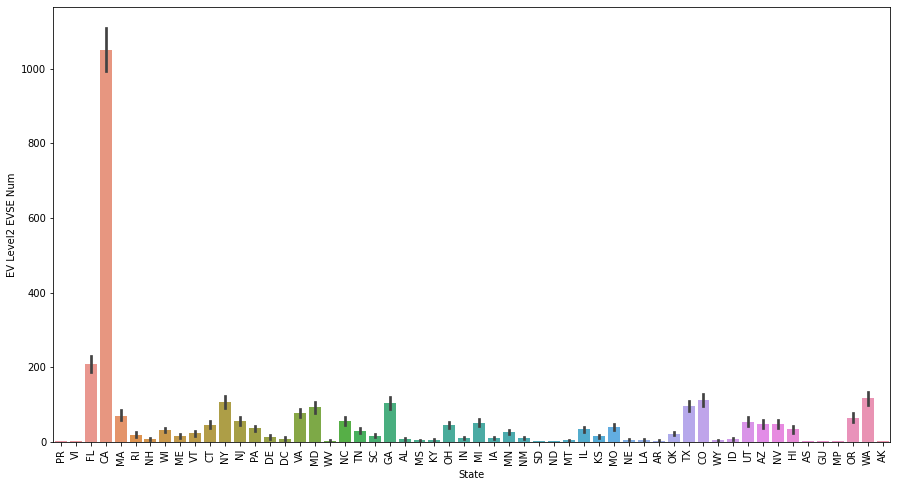

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=f,x='State',y='EV Level2 EVSE Num')
plt.xticks(rotation=90)
plt.show()

Similar statistics as EV Level1 are seen for EV Level2 as well.
1. California has the highest number of Level2 charging stations followed by Florida.
2. Washington is the third in line.

However, if we compare the previous two plots, we can see that the Level2 charging stations are high in number opposed to Level1 charging stations.

## Plot 3

EV Pricing across states as per EV Network

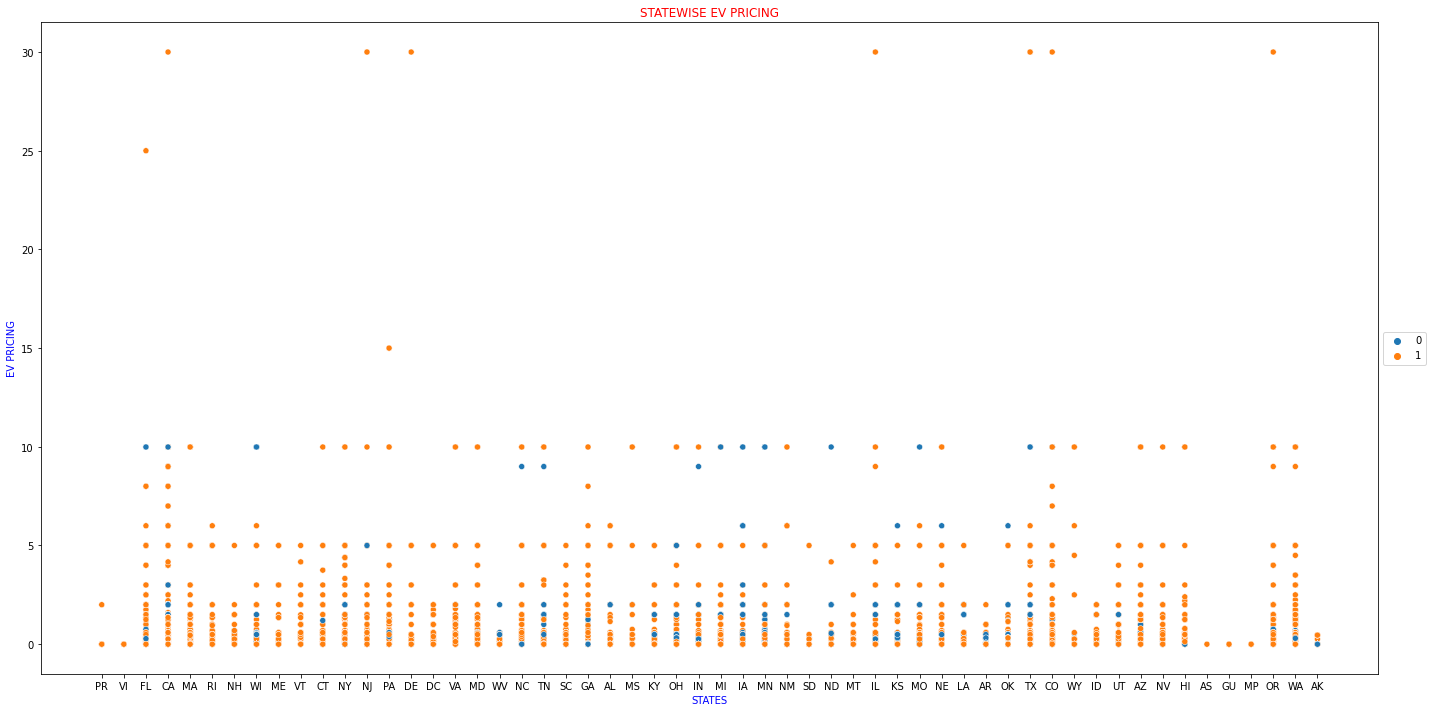

In [ ]:
plt.figure(figsize = (20,10))
sns.scatterplot(data = f, x = 'State', y = 'EV Pricing', hue = 'EV Network' )
plt.legend(loc = 'center left' , bbox_to_anchor = (1,0.5))
plt.xlabel("STATES",color='blue')
plt.ylabel("EV PRICING",color='blue')
plt.title("STATEWISE EV PRICING",color='red')
plt.tight_layout()
plt.show()

We see that the states of California, Texas, Illinois, Newyork have the highest prices for EV Charging and all belong to a EV Network. 

## Plot-4


Distribution comparison between all the 5 class for population

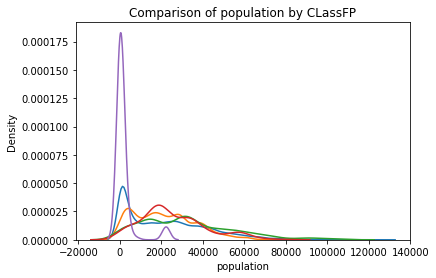

In [ ]:
# this is to plot the kde
sns.kdeplot(f.population[f.CLASSFP == "H1"],label='H1')
sns.kdeplot(f.population[f.CLASSFP == "H4"],label='H4')
sns.kdeplot(f.population[f.CLASSFP == "H6"],label='H6')
sns.kdeplot(f.population[f.CLASSFP == "C7"],label='C7')
sns.kdeplot(f.population[f.CLASSFP == "H5"],label='H5')

plt.title('Comparison of population by CLassFP')
plt.show()

## Plot-5

**Plot**
To see sum of of values of electric vehicle pricing per state

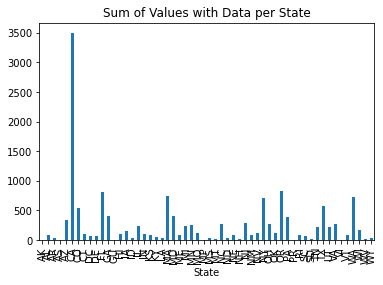

In [ ]:
# bar graph to see different states and there corresponding EV pricing
x = f.groupby(['State']).sum() 
x['EV Pricing'].plot.bar(title='Sum of Values with Data per State')
plt.show()

## Plot-6

**Plot**
To do a pie chart for access code which shows private and public data count

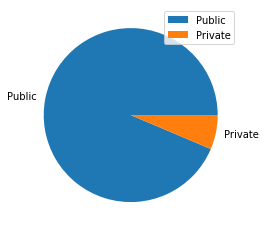

In [ ]:
# pie chart for access code
y = f['Access Code'].value_counts()
mylabels = ["Public", "Private"]
myexplode = [0.2, 0, 0, 0]


plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

## Plot-7

comparison scatterplot between density and tax return filed based on EV Pricing. 

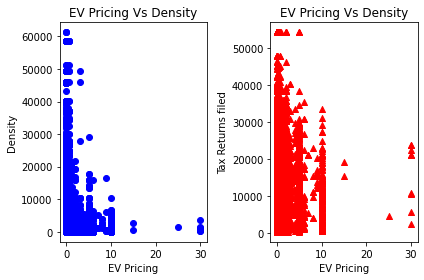

In [ ]:
# two panel scatterplots 
fig = plt.figure()
# Adding subplots
x1 = fig.add_subplot(121)
x2 = fig.add_subplot(122)
x1.scatter(x = f['EV Pricing'], y = f['density'], color = 'blue')
x2.scatter(x = f['EV Pricing'], y = f['TaxReturnsFiled'], color='red', marker = '^')
# Title
x1.set_title('EV Pricing Vs Density')
# Labelling
x1.set_xlabel('EV Pricing')
x1.set_ylabel('Density')
# Title
x2.set_title('EV Pricing Vs Density')
# Labelling
x2.set_xlabel('EV Pricing')
x2.set_ylabel('Tax Returns filed')
# this helps in spacing between the subplots
plt.tight_layout()

## Plot-8

Looking if we can see any relation between density and tax returns filed. The Graph doesnot show any steady relation

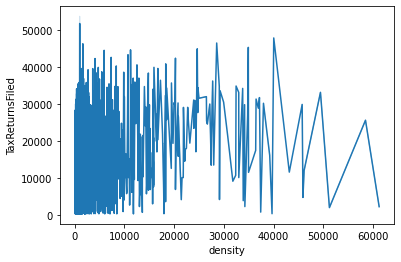

In [ ]:
# Line graph
sns.lineplot(data=f, x="density", y="TaxReturnsFiled")

## Plot-9

**Plot** 

Distribution of Population. </br>
The population is skewed right

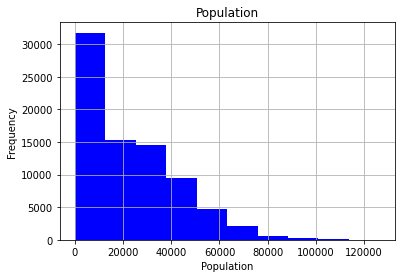

In [ ]:
# histogram
f.hist('population', color='blue')
# title
plt.title('Population')
# labelling x axis
plt.xlabel('Population')
# labelling y axis
plt.ylabel('Frequency')
# display histogram
plt.show()

## Plot-10

comparison scatterplot between Population and totalwages based on EV Pricing. 

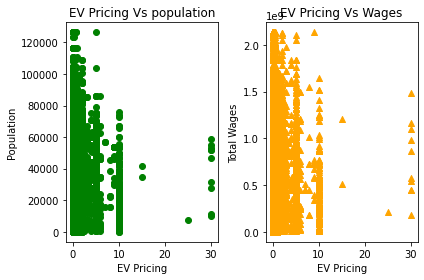

In [ ]:
# two panel scatterplots 
fig = plt.figure()
# Adding subplots
x1 = fig.add_subplot(121)
x2 = fig.add_subplot(122)
x1.scatter(x = f['EV Pricing'], y = f['population'], color = 'green')
x2.scatter(x = f['EV Pricing'], y = f['TotalWages'], color='orange', marker = '^')
# Title
x1.set_title('EV Pricing Vs population')
# Labelling
x1.set_xlabel('EV Pricing')
x1.set_ylabel('Population')
# Title
x2.set_title('EV Pricing Vs Wages')
# Labelling
x2.set_xlabel('EV Pricing')
x2.set_ylabel('Total Wages')
# this helps in spacing between the subplots
plt.tight_layout()

## Plot-11

To do a pie chart for target variable which shows 0 and 1 data count

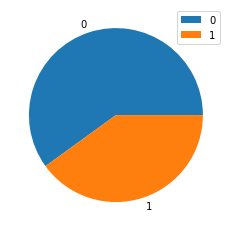

In [ ]:
# pie chart for access code
y = f['Target'].value_counts()
mylabels = ["0", "1"]
myexplode = [0.2, 0, 0, 0]


plt.pie(y, labels = mylabels)
plt.legend()
plt.show() 

## Table-1 

Grouping based on State and corresponding summary statistics 

In [ ]:
f.groupby('State').describe()

Fuel Code Type                                               \
               count      mean       std  min  25%  50%  75%  max   
State                                                               
AK             262.0  0.145038  0.352813  0.0  0.0  0.0  0.0  1.0   
AL             893.0  0.293393  0.455572  0.0  0.0  0.0  1.0  1.0   
AR             772.0  0.191710  0.393901  0.0  0.0  0.0  0.0  1.0   
AS               1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0   
AZ            1216.0  0.651316  0.476750  0.0  0.0  1.0  1.0  1.0   
...              ...       ...       ...  ...  ...  ...  ...  ...   
VT             499.0  0.637275  0.481269  0.0  0.0  1.0  1.0  1.0   
WA            2166.0  0.786242  0.410053  0.0  1.0  1.0  1.0  1.0   
WI            1356.0  0.348820  0.476773  0.0  0.0  0.0  1.0  1.0   
WV             788.0  0.130711  0.337298  0.0  0.0  0.0  0.0  1.0   
WY             245.0  0.261224  0.440201  0.0  0.0  0.0  1.0  1.0   

      EV Level1 EVSE Num             ... Target      Count_EV             \
                   count       mean  ...    75%  max    count       mean   
State                                ...                                   
AK                 262.0  16.793893  ...    0.0  1.0    262.0   1.351145   
AL                 893.0  14.367301  ...    1.0  1.0    893.0   1.335946   
AR                 772.0  12.861399  ...    0.0  1.0    772.0   1.025907   
AS                   1.0  20.000000  ...    0.0  0.0      1.0   0.000000   
AZ                1216.0   6.181743  ...    1.0  1.0   1216.0   7.716283   
...                  ...        ...  ...    ...  ...      ...        ...   
VT                 499.0  16.264529  ...    1.0  1.0    499.0   6.841683   
WA                2166.0  47.023084  ...    1.0  1.0   2166.0  18.974608   
WI                1356.0  30.316372  ...    1.0  1.0   1356.0   1.749263   
WV                 788.0  17.161168  ...    0.0  1.0    788.0   0.333756   
WY                 245.0  12.032653  ...    1.0  1.0    245.0   1.632653   

                                              
             std  min  25%  50%   75%    max  
State                                         
AK      4.550144  0.0  0.0  0.0   0.0   18.0  
AL      2.764934  0.0  0.0  0.0   1.0   32.0  
AR      2.852055  0.0  0.0  0.0   0.0   16.0  
AS           NaN  0.0  0.0  0.0   0.0    0.0  
AZ      9.705843  0.0  0.0  4.0  13.0   36.0  
...          ...  ...  ...  ...   ...    ...  
VT      9.005408  0.0  0.0  2.0  10.0   26.0  
WA     26.606964  0.0  1.0  8.0  23.0  105.0  
WI      3.433152  0.0  0.0  0.0   2.0   18.0  
WV      1.042442  0.0  0.0  0.0   0.0    7.0  
WY      4.088638  0.0  0.0  0.0   1.0   16.0  

[56 rows x 160 columns]

## Table-2

 A table that shows zipcode and if that zipcode has a EV network or nnot

In [ ]:
# subsetting X varible 
X = f[['ZIP', 'EV Network']]
X

ZIP  EV Network
0      00601           1
1      00602           1
2      00603           1
3      00606           1
4      00610           1
...      ...         ...
78763  99923           1
78764  99925           1
78765  99926           1
78766  99927           1
78767  99929           0

[78768 rows x 2 columns]

## Table-3

To see table group based on Class category and perform few statistics 

In [ ]:
# Grouping based on CLASSFP with min median and max values
f.groupby('CLASSFP').agg(['min', 'median', 'max'])

Fuel Code Type               ZIP                 EV Level1 EVSE Num  \
                   min median max    min   median    max                min   
CLASSFP                                                                       
C7                   0    1.0   1  21201  23320.0  89702                0.0   
H1                   0    1.0   1  00601  61215.5  99929                0.0   
H4                   0    1.0   1  00802   2141.0  96929                0.0   
H5                   0    0.0   1  99546  99684.5  99927                0.0   
H6                   0    1.0   1  10001  32207.0  99835                0.0   

                      EV Level2 EVSE Num  ... oth_ratio tot_ratio            \
        median    max                min  ...       max       min    median   
CLASSFP                                   ...                                 
C7        14.0   51.0                0.0  ...       1.0  0.041667  0.071429   
H1        20.0  209.0                0.0  ...       1.0  0.016393  0.125000   
H4        19.0   39.0                0.0  ...       1.0  0.043478  0.142857   
H5        20.0   20.0                0.0  ...       1.0  1.000000  1.000000   
H6        20.0  209.0                0.0  ...       1.0  0.021739  0.083333   

             Target            Count_EV              
         max    min median max      min median  max  
CLASSFP                                              
C7       1.0      0    1.0   1        0    9.0   48  
H1       1.0      0    1.0   1        0    3.0  366  
H4       1.0      0    1.0   1        0    8.0   83  
H5       1.0      0    0.0   1        0    0.0    2  
H6       1.0      0    1.0   1        0   11.0   81  

[5 rows x 63 columns]

## Table-4

Subsetting state to see only Connecticut's data

In [ ]:
# subsetting Connecticut
x1 = f[f['State'] == 'CT']
x1

Fuel Code Type        City State    ZIP  EV Level1 EVSE Num  \
4132               1        Avon    CT  06001                24.0   
4133               0  Bloomfield    CT  06002                 0.0   
4134               1  Bloomfield    CT  06002                24.0   
4135               1  Bloomfield    CT  06002                24.0   
4136               1  Bloomfield    CT  06002                24.0   
...              ...         ...   ...    ...                 ...   
4823               1    Stamford    CT  06905                24.0   
4824               1    Stamford    CT  06905                24.0   
4825               1    Stamford    CT  06905                24.0   
4826               0    Stamford    CT  06906                20.0   
4827               0    Stamford    CT  06907                20.0   

      EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
4132                 2.0           1               1                   1   
4133                 0.0           0               0                   0   
4134                 2.0           1               1                   1   
4135                 2.0           1               1                   1   
4136                 2.0           1               1                   1   
...                  ...         ...             ...                 ...   
4823               460.0           1               1                   1   
4824               460.0           1               1                   1   
4825               460.0           1               1                   1   
4826                 2.0           1               1                   1   
4827                 2.0           1               1                   1   

     Access Code  ...  CLASSFP  Decommisioned   TotalWages  TaxReturnsFiled  \
4132      public  ...       H4            0.0  932054075.0           9182.0   
4133      public  ...       H4            0.0  516113780.0          11413.0   
4134     private  ...       H4            0.0  516113780.0          11413.0   
4135     private  ...       H4            0.0  516113780.0          11413.0   
4136      public  ...       H4            0.0  516113780.0          11413.0   
...          ...  ...      ...            ...          ...              ...   
4823      public  ...       H4            0.0  791584530.0          10634.0   
4824      public  ...       H4            0.0  791584530.0          10634.0   
4825      public  ...       H4            0.0  791584530.0          10634.0   
4826      public  ...       H4            0.0  270480372.0           4838.0   
4827      public  ...       H4            0.0  324883757.0           4783.0   

      res_ratio bus_ratio  oth_ratio  tot_ratio  Target  Count_EV  
4132   0.166667  0.166667   0.166667   0.166667       1         1  
4133   0.111111  0.111111   0.111111   0.111111       0         0  
4134   0.111111  0.111111   0.111111   0.111111       1         4  
4135   0.111111  0.111111   0.111111   0.111111       1         4  
4136   0.111111  0.111111   0.111111   0.111111       1         4  
...         ...       ...        ...        ...     ...       ...  
4823   0.100000  0.100000   0.100000   0.100000       1         8  
4824   0.100000  0.100000   0.100000   0.100000       1         8  
4825   0.100000  0.100000   0.100000   0.100000       1         8  
4826   0.250000  0.250000   0.250000   0.250000       0         0  
4827   0.250000  0.250000   0.250000   0.250000       0         0  

[695 rows x 25 columns]

## Table-5
To look for rows that has EV stations for density less than median density of dataset

In [ ]:
f['density'].median()

398.05

In [ ]:
# getting data for the rows which has less then the median density size
density = f[f['density'] < 398]
print(density.shape) # to show shape 
                      
density.head(10)

(39382, 25)


Fuel Code Type           City State    ZIP  EV Level1 EVSE Num  \
0                0       Adjuntas    PR  00601                20.0   
3                0        Maricao    PR  00606                20.0   
4                0         Anasco    PR  00610                20.0   
5                0        Arecibo    PR  00612                20.0   
6                0       Bajadero    PR  00616                20.0   
8                0       Boqueron    PR  00622                20.0   
10               0       Penuelas    PR  00624                20.0   
11               0          Camuy    PR  00627                20.0   
12               0       Castaner    PR  00631                20.0   
13               0  Sabana Grande    PR  00637                20.0   

    EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                  2.0           1               1                   1   
3                  2.0           1               1                   1   
4                  2.0           1               1                   1   
5                  2.0           1               1                   1   
6                  2.0           1               1                   1   
8                  2.0           1               1                   1   
10                 2.0           1               1                   1   
11                 2.0           1               1                   1   
12                 2.0           1               1                   1   
13                 2.0           1               1                   1   

   Access Code  ...  CLASSFP  Decommisioned    TotalWages  TaxReturnsFiled  \
0       public  ...       H1            0.0  4.489391e+08      10062.99415   
3       public  ...       H1            0.0  4.489391e+08      10062.99415   
4       public  ...       H1            0.0  4.489391e+08      10062.99415   
5       public  ...       H1            0.0  4.489391e+08      10062.99415   
6       public  ...       H1            0.0  4.489391e+08      10062.99415   
8       public  ...       H1            0.0  4.489391e+08      10062.99415   
10      public  ...       H1            0.0  4.489391e+08      10062.99415   
11      public  ...       H1            0.0  4.489391e+08      10062.99415   
12      public  ...       H1            0.0  4.489391e+08      10062.99415   
13      public  ...       H1            0.0  4.489391e+08      10062.99415   

    res_ratio bus_ratio  oth_ratio  tot_ratio  Target  Count_EV  
0    0.250000  0.250000   0.250000   0.250000       0         0  
3    0.500000  0.500000   0.500000   0.500000       0         0  
4    0.200000  0.200000   0.200000   0.200000       0         0  
5    0.038462  0.038462   0.038462   0.038462       0         0  
6    1.000000  1.000000   1.000000   1.000000       0         0  
8    1.000000  1.000000   1.000000   1.000000       0         0  
10   0.166667  0.166667   0.166667   0.166667       0         0  
11   0.250000  0.250000   0.250000   0.250000       0         0  
12   0.000000  0.000000   1.000000   1.000000       0         0  
13   0.166667  0.166667   0.166667   0.166667       0         0  

[10 rows x 25 columns]

## Table-6

To subset rows that has only private access code

In [ ]:
# Subsetting the rows where access code is private 
Accessdf = f[f['Access Code'] == 'private']
Accessdf

Fuel Code Type         City State    ZIP  EV Level1 EVSE Num  \
131                 1     Guaynabo    FL  00965                 1.0   
218                 1       Hadley    MA  01035                19.0   
223                 1  Northampton    MA  01035                19.0   
231                 1      Holyoke    MA  01040                19.0   
236                 0  Northampton    MA  01053                 0.0   
...               ...          ...   ...    ...                 ...   
78478               1     Richland    WA  99354                 1.0   
78485               0  Walla Walla    WA  99362                 0.0   
78504               0    Clarkston    WA  99403                 0.0   
78743               1       Juneau    AK  99801                 0.0   
78753               1        SITKA    AK  99835                 0.0   

       EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
131                2229.0           1               1                   1   
218                   1.0           1               1                   1   
223                   1.0           1               1                   1   
231                   2.0           1               1                   1   
236                   0.0           0               0                   0   
...                   ...         ...             ...                 ...   
78478                 1.0           1               1                   1   
78485                 0.0           0               0                   0   
78504                 0.0           0               0                   0   
78743                 1.0           1               1                   1   
78753                 1.0           1               1                   1   

      Access Code  ...  CLASSFP  Decommisioned    TotalWages  TaxReturnsFiled  \
131       private  ...       H1            0.0  4.489391e+08      10062.99415   
218       private  ...       H4            0.0  9.713473e+07       2617.00000   
223       private  ...       H4            0.0  9.713473e+07       2617.00000   
231       private  ...       H4            0.0  4.851253e+08      16192.00000   
236       private  ...       H4            0.0  3.401503e+07        895.00000   
...           ...  ...      ...            ...           ...              ...   
78478     private  ...       H1            0.0  4.086880e+08       9574.00000   
78485     private  ...       H1            0.0  5.726125e+08      17114.00000   
78504     private  ...       H1            0.0  2.569126e+08       8673.00000   
78743     private  ...       H6            0.0  4.459404e+08      11123.00000   
78753     private  ...       H6            0.0  1.485859e+08       4578.00000   

       res_ratio bus_ratio  oth_ratio  tot_ratio  Target  Count_EV  
131     0.111111  0.111111   0.111111   0.111111       1         1  
218     1.000000  1.000000   1.000000   1.000000       1        10  
223     1.000000  1.000000   1.000000   1.000000       1        10  
231     0.083333  0.083333   0.083333   0.083333       1         5  
236     1.000000  1.000000   1.000000   1.000000       0         0  
...          ...       ...        ...        ...     ...       ...  
78478   0.142857  0.142857   0.142857   0.142857       1        53  
78485   0.083333  0.083333   0.083333   0.083333       0         0  
78504   0.125000  0.125000   0.125000   0.125000       0         0  
78743   0.166667  0.166667   0.166667   0.166667       1        18  
78753   0.500000  0.500000   0.500000   0.500000       1         1  

[5027 rows x 25 columns]

## Table-7

To see table group based on Access Code category and perform few statistics

In [ ]:
# Grouping based on CLASSFP with min median and max values
f.groupby('Access Code').agg(['min', 'median', 'max'])

Fuel Code Type               ZIP                  \
                       min median max    min   median    max   
Access Code                                                    
private                  0    1.0   1  00965  53081.0  99835   
public                   0    1.0   1  00601  58503.0  99929   

            EV Level1 EVSE Num               EV Level2 EVSE Num  ...  \
                           min median    max                min  ...   
Access Code                                                      ...   
private                    0.0   10.0  209.0                0.0  ...   
public                     0.0   20.0  209.0                0.0  ...   

            oth_ratio tot_ratio                Target            Count_EV  \
                  max       min    median  max    min median max      min   
Access Code                                                                 
private           1.0  0.021739  0.090909  1.0      0    1.0   1        0   
public            1.0  0.016393  0.125000  1.0      0    1.0   1        0   

                         
            median  max  
Access Code              
private        3.0  366  
public         3.0  366  

[2 rows x 63 columns]

## Table-8

 A table that shows zipcode and if that zipcode has a Target or not

In [ ]:
# subsetting X varible 
X1 = f[['ZIP', 'Target']]
X1

ZIP  Target
0      00601       0
1      00602       0
2      00603       0
3      00606       0
4      00610       0
...      ...     ...
78763  99923       0
78764  99925       0
78765  99926       0
78766  99927       0
78767  99929       0

[78768 rows x 2 columns]

## Table-9

Subsetting state to see only Newyork's data

In [ ]:
# subsetting NewYork
x2 = f[f['State'] == 'NY']
x2

Fuel Code Type            City State    ZIP  EV Level1 EVSE Num  \
4434                0  Fishers Island    NY  06390                20.0   
5947                0        New York    NY  10001                 0.0   
5948                1        New York    NY  10001                23.0   
5949                1        New York    NY  10001                23.0   
5950                1        New York    NY  10001                23.0   
...               ...             ...   ...    ...                 ...   
10101               0  Elmira Heights    NY  14903                 0.0   
10102               0          Elmira    NY  14903                 0.0   
10103               0          Elmira    NY  14904                20.0   
10104               1          Elmira    NY  14905                23.0   
12747               1     Westchester    NY  19382                23.0   

       EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
4434                  2.0           1               1                   1   
5947                  0.0           0               0                   0   
5948                  1.0           1               1                   1   
5949                  3.0           1               1                   1   
5950                  3.0           1               1                   1   
...                   ...         ...             ...                 ...   
10101                 0.0           0               0                   0   
10102                 0.0           0               0                   0   
10103                 2.0           1               1                   1   
10104                 2.0           1               1                   1   
12747                 2.0           1               1                   1   

      Access Code  ...  CLASSFP  Decommisioned    TotalWages  TaxReturnsFiled  \
4434       public  ...       H1            0.0  4.489391e+08      10062.99415   
5947       public  ...       H6            0.0  1.031960e+09      12534.00000   
5948       public  ...       H6            0.0  1.031960e+09      12534.00000   
5949       public  ...       H6            0.0  1.031960e+09      12534.00000   
5950       public  ...       H6            0.0  1.031960e+09      12534.00000   
...           ...  ...      ...            ...           ...              ...   
10101      public  ...       H1            0.0  1.465409e+08       3782.00000   
10102      public  ...       H1            0.0  1.465409e+08       3782.00000   
10103      public  ...       H1            0.0  1.922175e+08       7361.00000   
10104      public  ...       H1            0.0  1.772834e+08       4529.00000   
12747      public  ...       H1            0.0  1.687696e+09      24193.00000   

       res_ratio bus_ratio  oth_ratio  tot_ratio  Target  Count_EV  
4434    0.000000  1.000000   1.000000   1.000000       0         0  
5947    0.071429  0.071429   0.071429   0.071429       0         0  
5948    0.071429  0.071429   0.071429   0.071429       1        12  
5949    0.071429  0.071429   0.071429   0.071429       1        12  
5950    0.071429  0.071429   0.071429   0.071429       1        12  
...          ...       ...        ...        ...     ...       ...  
10101   0.166667  0.166667   0.166667   0.166667       0         0  
10102   0.166667  0.166667   0.166667   0.166667       0         0  
10103   0.250000  0.250000   0.250000   0.250000       0         0  
10104   0.166667  0.166667   0.166667   0.166667       1         1  
12747   0.043478  0.043478   0.043478   0.043478       1        10  

[4160 rows x 25 columns]

## Table-10

To look for rows that has EV stations for total wages greater than median total wages of dataset

In [ ]:
f['TotalWages'].median()

419465269.0

In [ ]:
# getting data for the rows which has less then the median total wages size
density = f[f['TotalWages'] > 419465269]
print(density.shape) # to show shape 
                      
density.head(10)

(39382, 25)


Fuel Code Type         City State    ZIP  EV Level1 EVSE Num  \
0               0     Adjuntas    PR  00601                20.0   
1               0       Aguada    PR  00602                20.0   
2               0    Aguadilla    PR  00603                20.0   
3               0      Maricao    PR  00606                20.0   
4               0       Anasco    PR  00610                20.0   
5               0      Arecibo    PR  00612                20.0   
6               0     Bajadero    PR  00616                20.0   
7               0  Barceloneta    PR  00617                20.0   
8               0     Boqueron    PR  00622                20.0   
9               0    Cabo Rojo    PR  00623                20.0   

   EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                 2.0           1               1                   1   
1                 2.0           1               1                   1   
2                 2.0           1               1                   1   
3                 2.0           1               1                   1   
4                 2.0           1               1                   1   
5                 2.0           1               1                   1   
6                 2.0           1               1                   1   
7                 2.0           1               1                   1   
8                 2.0           1               1                   1   
9                 2.0           1               1                   1   

  Access Code  ...  CLASSFP  Decommisioned    TotalWages  TaxReturnsFiled  \
0      public  ...       H1            0.0  4.489391e+08      10062.99415   
1      public  ...       H1            0.0  4.489391e+08      10062.99415   
2      public  ...       H1            0.0  4.489391e+08      10062.99415   
3      public  ...       H1            0.0  4.489391e+08      10062.99415   
4      public  ...       H1            0.0  4.489391e+08      10062.99415   
5      public  ...       H1            0.0  4.489391e+08      10062.99415   
6      public  ...       H1            0.0  4.489391e+08      10062.99415   
7      public  ...       H1            0.0  4.489391e+08      10062.99415   
8      public  ...       H1            0.0  4.489391e+08      10062.99415   
9      public  ...       H1            0.0  4.489391e+08      10062.99415   

   res_ratio bus_ratio  oth_ratio  tot_ratio  Target  Count_EV  
0   0.250000  0.250000   0.250000   0.250000       0         0  
1   0.250000  0.250000   0.250000   0.250000       0         0  
2   0.058824  0.058824   0.058824   0.058824       0         0  
3   0.500000  0.500000   0.500000   0.500000       0         0  
4   0.200000  0.200000   0.200000   0.200000       0         0  
5   0.038462  0.038462   0.038462   0.038462       0         0  
6   1.000000  1.000000   1.000000   1.000000       0         0  
7   0.166667  0.166667   0.166667   0.166667       0         0  
8   1.000000  1.000000   1.000000   1.000000       0         0  
9   0.090909  0.090909   0.090909   0.090909       0         0  

[10 rows x 25 columns]

# Data Analysis

### States with Highest Charging stations

●	Which states and cities have the highest count of charging stations?

In [ ]:
final_df4=f.copy()

In [ ]:
elec=final_df4.loc[final_df4['Fuel Code Type']==1]

In [ ]:
elec.groupby('State')['Fuel Code Type'].count().reset_index().sort_values(by='Fuel Code Type',ascending=False).head(10)

State  Fuel Code Type
4     CA           13917
34    NY            2833
9     FL            2497
44    TX            2211
19    MA            1943
48    WA            1703
10    GA            1541
5     CO            1521
20    MD            1178
38    PA            1095

California, New York and Florida has the highest Charging Stations in United States

### Cities with Highest Charging stations

In [ ]:
kk=elec.groupby('City')['Fuel Code Type'].count().reset_index().sort_values(by='Fuel Code Type',ascending=False).head(10)
kk

City  Fuel Code Type
2605    Los Angeles            1348
176         Atlanta             611
4009      San Diego             608
2146         Irvine             558
4016       San Jose             537
190          Austin             516
4012  San Francisco             504
2243    Kansas City             452
4122        Seattle             382
2827     Menlo Park             366

In [ ]:
kk['City'].unique()

array(['Los Angeles', 'Atlanta', 'San Diego', 'Irvine', 'San Jose',
       'Austin', 'San Francisco', 'Kansas City', 'Seattle', 'Menlo Park'],
      dtype=object)

As you can see that most of the cities are from California and Texas and from Minnesota

### EV Pricing

The EV Pricing column is cleaned and can be used for analysis

In [ ]:
final_df['EV Pricing'].value_counts()

0.00     64383
0.49      3885
0.59      2048
0.26      1214
2.00       975
         ...  
0.68         1
0.04         1
1.80         1
0.19         1
25.00        1
Name: EV Pricing, Length: 96, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


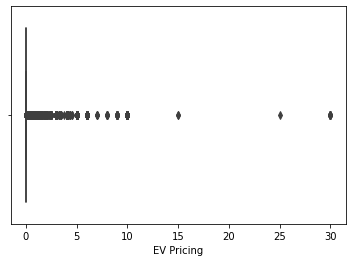

In [ ]:
sns.boxplot(final_df['EV Pricing'])

We can remove outliers and replace them with the mean value

In [ ]:
round(final_df4['EV Pricing'].mean(),2)

0.18

In [ ]:
final_df4.loc[final_df4['EV Pricing']>10,'EV Pricing']=round(final_df4['EV Pricing'].mean(),2)

In [ ]:
final_df4.rename(columns={'EV Pricing':'EV pricing clean'},inplace=True)

#### Distribution of EV Pricing

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


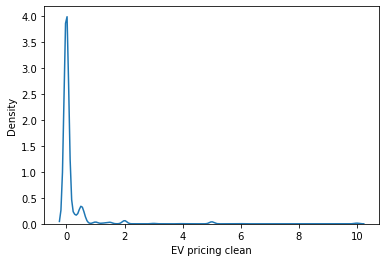

In [ ]:
sns.distplot(final_df4['EV pricing clean'],hist=False)

Most of the EV Pricing lies between 0 and 2

In [ ]:
final_df4.groupby('State')['EV pricing clean'].mean().reset_index().sort_values(by='EV pricing clean',ascending=False).head(10)

State  EV pricing clean
40    OR          0.633918
52    WA          0.331882
21    MA          0.329121
43    RI          0.315771
4     AZ          0.273210
22    MD          0.269368
6     CO          0.260634
10    FL          0.245607
9     DE          0.230854
13    HI          0.228594

In [ ]:
pd.set_option('display.max_columns',100)
final_df4.head()

Fuel Code Type       City State    ZIP  EV Level1 EVSE Num  \
0               0   Adjuntas    PR  00601                20.0   
1               0     Aguada    PR  00602                20.0   
2               0  Aguadilla    PR  00603                20.0   
3               0    Maricao    PR  00606                20.0   
4               0     Anasco    PR  00610                20.0   

   EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                 2.0           1               1                   1   
1                 2.0           1               1                   1   
2                 2.0           1               1                   1   
3                 2.0           1               1                   1   
4                 2.0           1               1                   1   

  Access Code  EV pricing clean        LAT        LNG  population  density  \
0      public               0.0  18.180555 -66.749961     16773.0    100.5   
1      public               0.0  18.361945 -67.175597     37083.0    472.1   
2      public               0.0  18.455183 -67.119887     45652.0    513.2   
3      public               0.0  18.158345 -66.932911      6231.0     54.3   
4      public               0.0  18.295366 -67.125135     26502.0    275.7   

  CLASSFP  Decommisioned    TotalWages  TaxReturnsFiled  res_ratio  bus_ratio  \
0      H1            0.0  4.489391e+08      10062.99415   0.250000   0.250000   
1      H1            0.0  4.489391e+08      10062.99415   0.250000   0.250000   
2      H1            0.0  4.489391e+08      10062.99415   0.058824   0.058824   
3      H1            0.0  4.489391e+08      10062.99415   0.500000   0.500000   
4      H1            0.0  4.489391e+08      10062.99415   0.200000   0.200000   

   oth_ratio  tot_ratio  Target  Count_EV  
0   0.250000   0.250000       0         0  
1   0.250000   0.250000       0         0  
2   0.058824   0.058824       0         0  
3   0.500000   0.500000       0         0  
4   0.200000   0.200000       0         0

In [ ]:
final_df4.loc[final_df4['Access Code']=='public','Access Code']=1
final_df4.loc[final_df4['Access Code']=='private','Access Code']=0

In [ ]:
final_df4['CLASSFP'].value_counts()

H1    73018
H4     2711
H6     2461
C7      450
H5      128
Name: CLASSFP, dtype: int64

In [ ]:
fps = ['H1','H4','H6','C7','H5']
status = [1,2,3,4,5]

final_df4['CLASSFP'] = final_df4['CLASSFP'].replace(fps, status)

In [ ]:
final_df4['CLASSFP'].value_counts()

1    73018
2     2711
3     2461
4      450
5      128
Name: CLASSFP, dtype: int64

In [ ]:
final_df4['Access Code']=final_df4['Access Code'].astype('int64')

In [ ]:
final_df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78768 entries, 0 to 78767
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Fuel Code Type      78768 non-null  int64  
 1   City                78768 non-null  object 
 2   State               78768 non-null  object 
 3   ZIP                 78768 non-null  object 
 4   EV Level1 EVSE Num  78768 non-null  float64
 5   EV Level2 EVSE Num  78768 non-null  float64
 6   EV Network          78768 non-null  int64  
 7   EV Network Web      78768 non-null  int64  
 8   EV Connector Types  78768 non-null  int64  
 9   Access Code         78768 non-null  int64  
 10  EV pricing clean    78768 non-null  float64
 11  LAT                 78768 non-null  float64
 12  LNG                 78768 non-null  float64
 13  population          78768 non-null  float64
 14  density             78768 non-null  float64
 15  CLASSFP             78768 non-null  int64  
 16  Deco

In [ ]:
final_df4.drop(columns=['LAT','LNG'],inplace=True)

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df=final_df4.copy()
df.head()

Fuel Code Type       City State    ZIP  EV Level1 EVSE Num  \
0               0   Adjuntas    PR  00601                20.0   
1               0     Aguada    PR  00602                20.0   
2               0  Aguadilla    PR  00603                20.0   
3               0    Maricao    PR  00606                20.0   
4               0     Anasco    PR  00610                20.0   

   EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
0                 2.0           1               1                   1   
1                 2.0           1               1                   1   
2                 2.0           1               1                   1   
3                 2.0           1               1                   1   
4                 2.0           1               1                   1   

   Access Code  EV pricing clean  population  density  CLASSFP  Decommisioned  \
0            1               0.0     16773.0    100.5        1            0.0   
1            1               0.0     37083.0    472.1        1            0.0   
2            1               0.0     45652.0    513.2        1            0.0   
3            1               0.0      6231.0     54.3        1            0.0   
4            1               0.0     26502.0    275.7        1            0.0   

     TotalWages  TaxReturnsFiled  res_ratio  bus_ratio  oth_ratio  tot_ratio  \
0  4.489391e+08      10062.99415   0.250000   0.250000   0.250000   0.250000   
1  4.489391e+08      10062.99415   0.250000   0.250000   0.250000   0.250000   
2  4.489391e+08      10062.99415   0.058824   0.058824   0.058824   0.058824   
3  4.489391e+08      10062.99415   0.500000   0.500000   0.500000   0.500000   
4  4.489391e+08      10062.99415   0.200000   0.200000   0.200000   0.200000   

   Target  Count_EV  
0       0         0  
1       0         0  
2       0         0  
3       0         0  
4       0         0

In [ ]:
df.drop(columns=['Count_EV'],inplace=True)

In [ ]:
y=df['Target']

In [ ]:
X_train_m1,X_test_m1,y_train_m1,y_test_m1=train_test_split(df,y,test_size=0.2,random_state=3)

In [ ]:
X_train_m1.head()

Fuel Code Type         City State    ZIP  EV Level1 EVSE Num  \
76047               1  Springfield    OR  97477                27.0   
59121               1  Los Angeles    CA  90007               209.0   
36248               0   Doylestown    WI  53928                20.0   
19568               1   Charleston    SC  29401                 8.0   
64935               1       Irvine    CA  92603               209.0   

       EV Level2 EVSE Num  EV Network  EV Network Web  EV Connector Types  \
76047               849.0           1               1                   1   
59121                 2.0           1               1                   1   
36248                 2.0           1               1                   1   
19568                 2.0           1               1                   1   
64935                 2.0           1               1                   1   

       Access Code  EV pricing clean  population  density  CLASSFP  \
76047            1              0.26     38073.0   1183.4        1   
59121            1              0.00     42380.0   6733.4        1   
36248            1              0.00        92.0     36.3        1   
19568            1              0.00      9360.0   2355.3        1   
64935            1              0.00     20183.0    780.3        1   

       Decommisioned    TotalWages  TaxReturnsFiled  res_ratio  bus_ratio  \
76047            0.0  4.315358e+08      15926.00000   0.090909   0.090909   
59121            0.0  2.623708e+08      12367.00000   0.043478   0.043478   
36248            0.0  4.489391e+08      10062.99415   1.000000   0.000000   
19568            0.0  2.429088e+08       4007.00000   0.142857   0.142857   
64935            0.0  1.000358e+09       8819.00000   0.200000   0.200000   

       oth_ratio  tot_ratio  Target  
76047   0.090909   0.090909       1  
59121   0.043478   0.043478       1  
36248   1.000000   1.000000       0  
19568   0.142857   0.142857       1  
64935   0.200000   0.200000       1

In [ ]:
meta_m1_train=X_train_m1.iloc[:,1:4]
meta_m1_test=X_test_m1.iloc[:,1:4]
# meta_m1_train['Data.Cholesterol']=X_train_m1['Data.Cholesterol']
X_train_m1.drop(columns=['ZIP','Fuel Code Type','City','State','Target'],inplace=True)
X_test_m1.drop(columns=['ZIP','Fuel Code Type','City','State','Target'],inplace=True)
# meta_m1_test=X_test_m1.iloc[:,:3]
# meta_m1_test['Data.Cholesterol']=X_test_m1['Data.Cholesterol']
# meta_m1_train['Data.Label']=X_train_m1['Data.Label']
# meta_m1_test['Data.Label']=X_test_m1['Data.Label']

In [ ]:
X_train_m1.shape,X_test_m1.shape,y_train_m1.shape,y_test_m1.shape

((63014, 17), (15754, 17), (63014,), (15754,))

In [ ]:
X_train_m1.head()

EV Level1 EVSE Num  EV Level2 EVSE Num  EV Network  EV Network Web  \
76047                27.0               849.0           1               1   
59121               209.0                 2.0           1               1   
36248                20.0                 2.0           1               1   
19568                 8.0                 2.0           1               1   
64935               209.0                 2.0           1               1   

       EV Connector Types  Access Code  EV pricing clean  population  density  \
76047                   1            1              0.26     38073.0   1183.4   
59121                   1            1              0.00     42380.0   6733.4   
36248                   1            1              0.00        92.0     36.3   
19568                   1            1              0.00      9360.0   2355.3   
64935                   1            1              0.00     20183.0    780.3   

       CLASSFP  Decommisioned    TotalWages  TaxReturnsFiled  res_ratio  \
76047        1            0.0  4.315358e+08      15926.00000   0.090909   
59121        1            0.0  2.623708e+08      12367.00000   0.043478   
36248        1            0.0  4.489391e+08      10062.99415   1.000000   
19568        1            0.0  2.429088e+08       4007.00000   0.142857   
64935        1            0.0  1.000358e+09       8819.00000   0.200000   

       bus_ratio  oth_ratio  tot_ratio  
76047   0.090909   0.090909   0.090909  
59121   0.043478   0.043478   0.043478  
36248   0.000000   1.000000   1.000000  
19568   0.142857   0.142857   0.142857  
64935   0.200000   0.200000   0.200000

In [ ]:
X_train_m1 = np.array(X_train_m1)
X_test_m1 = np.array(X_test_m1)
y_train_m1 = np.array(y_train_m1)
y_test_m1 = np.array(y_test_m1)

In [ ]:
scaler = MinMaxScaler()
X_train_m1 = scaler.fit_transform(X_train_m1)
X_test_m1= scaler.transform(X_test_m1)

# Modeling

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier

## Classification

### Model-1

In [ ]:
# Load libraries
from collections import Counter
import warnings
warnings.filterwarnings('ignore')
# preprocessing 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score


# pca
from sklearn.decomposition import PCA

# regression spot check models!
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import SGDRegressor,Lasso,Ridge,LassoLars,LogisticRegression,LinearRegression

# more advanced ensemble models
from sklearn.svm import SVR
## metrics
from sklearn.metrics import mean_absolute_error,f1_score,confusion_matrix,accuracy_score,classification_report

In [ ]:
lr=LogisticRegression()
lr.fit(X_train_m1,y_train_m1)
x_pred_m1=lr.predict(X_train_m1)
print("Training F1: ",classification_report(x_pred_m1,y_train_m1))
print("Training F1: ",f1_score(x_pred_m1,y_train_m1))

y_predd_m1=lr.predict(X_test_m1)
print("Testing F1: ",f1_score(y_test_m1,y_predd_m1))
meta_m1_test['preds']=y_predd_m1

Training F1:                precision    recall  f1-score   support

           0       0.92      0.89      0.90     26094
           1       0.92      0.95      0.93     36920

    accuracy                           0.92     63014
   macro avg       0.92      0.92      0.92     63014
weighted avg       0.92      0.92      0.92     63014

Training F1:  0.9333975284865993
Testing F1:  0.9317321216055393


### Model-2

In [ ]:
df=final_df4.copy()

#### Variable Selection

In [ ]:
df.drop(columns=['CLASSFP','Decommisioned','res_ratio','bus_ratio','oth_ratio','tot_ratio','TaxReturnsFiled'],inplace=True)

In [ ]:
y=df['Target']
df.drop(columns=['Count_EV'],inplace=True)

X_train_m2,X_test_m2,y_train_m2,y_test_m2=train_test_split(df,y,test_size=0.2,random_state=3)
meta_m2_train=X_train_m2.iloc[:,1:4]
meta_m2_test=X_test_m2.iloc[:,1:4]

X_train_m2.drop(columns=['ZIP','Fuel Code Type','City','State','Target'],inplace=True)
X_test_m2.drop(columns=['ZIP','Fuel Code Type','City','State','Target'],inplace=True)

#### Spot Checking

ScaledLR: 0.917098 (0.003319)
ScaledGBC: 0.994827 (0.000640)
ScaledRFC: 0.998223 (0.000540)


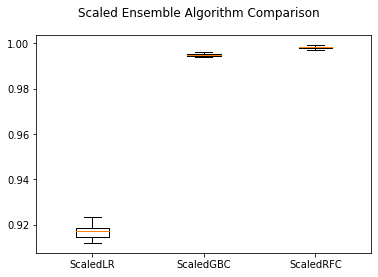

In [ ]:
# ensembles
ensembles = []
ensembles.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression())])))
ensembles.append(('ScaledGBC', Pipeline([('Scaler', StandardScaler()),('GBC', GradientBoostingClassifier())])))
ensembles.append(('ScaledRFC', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestClassifier())])))

results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=10, random_state=123, shuffle=True)
	cv_results = cross_val_score(model, X_train_m2, y_train_m2, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Hyperparameter Tuning

In [ ]:
pipe_gb = Pipeline([('scl', StandardScaler()),
			('clf', GradientBoostingClassifier(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=42))])

In [ ]:
grid_params_gb = [{'clf__n_estimators': [3,5],
                'clf__loss': ['deviance', 'exponential']}]

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
                  'clf__n_estimators': [30, 50,]}]

In [ ]:
gs_gb = GridSearchCV(estimator=pipe_gb,
    param_grid=grid_params_gb,
    scoring='accuracy',
    cv=10)

gs_rf = GridSearchCV(estimator=pipe_rf,
    param_grid=grid_params_rf,
    scoring='accuracy',
    cv=10)

In [ ]:
# List of pipelines for ease of iteration
grids = [gs_gb, gs_rf]

# Dictionary of pipelines and regression types for ease of reference
grid_dict = {0: 'Gradient Boosting Classifier',
             1: 'Random Forest Regressor'}

In [ ]:

# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train_m2, y_train_m2)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test_m2)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(y_test_m2, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(y_test_m2, y_pred) > best_acc:
		best_acc = accuracy_score(y_test_m2, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Gradient Boosting Classifier
Best params: {'clf__loss': 'deviance', 'clf__n_estimators': 5}
Best training accuracy: 0.992
Test set accuracy score for best params: 0.993 

Estimator: Random Forest Regressor
Best params: {'clf__criterion': 'entropy', 'clf__n_estimators': 30}
Best training accuracy: 0.998
Test set accuracy score for best params: 0.999 

Classifier with best test set accuracy: Random Forest Regressor


In [ ]:
rfc=RandomForestClassifier(criterion='gini',n_estimators=5)
rfc.fit(X_train_m2,y_train_m2)
y_pred=rfc.predict(X_test_m2)
meta_m2_test['preds']=y_pred

The best model is the Random Forest Regressor with 99% train and Test accuracy

### Model-3 AutoML

In [ ]:
# if it hasn't been already... this is how you install a new module to colab
!pip install tpot

     |████████████████████████████████| 87 kB 5.5 MB/s 
     |████████████████████████████████| 160 kB 39.5 MB/s 
     |████████████████████████████████| 193.7 MB 39 kB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=b9084801c640767b14043488d7958c7191aa5867be2b78ec93b2b024d7f2882c
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [ ]:
df=final_df4.copy()
df.drop(columns=['CLASSFP','Decommisioned','res_ratio','bus_ratio','oth_ratio','tot_ratio','TaxReturnsFiled'],inplace=True)
df=df.sample(frac=0.05,replace=False)
y=df['Target']
df.drop(columns=['Count_EV'],inplace=True)

X_train_m3,X_test_m3,y_train_m3,y_test_m3=train_test_split(df,y,test_size=0.2,random_state=3)
meta_m3_train=X_train_m3.iloc[:,1:4]
meta_m3_test=X_test_m3.iloc[:,1:4]

X_train_m3.drop(columns=['ZIP','Fuel Code Type','City','State','Target'],inplace=True)
X_test_m3.drop(columns=['ZIP','Fuel Code Type','City','State','Target'],inplace=True)

In [ ]:
from tpot import TPOTClassifier
import time

# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTClassifier(generations=1, verbosity=2)
tpot.fit(X_train_m3, y_train_m3)
end_time = time.time()

# Results
print('TPOT classifier finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test accuracy: %.3f' % tpot.score(X_test_m3, y_test_m3))

# Save best pipeline as Python script file
# make sure you update this path
tpot.export('tpot_breastcancer_pipeline.py') # this will locally download on the left

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.993015873015873

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=True, criterion=gini, max_features=0.35000000000000003, min_samples_leaf=5, min_samples_split=7, n_estimators=100)
TPOT classifier finished in 426.84894609451294 seconds
Best pipeline test accuracy: 0.994


In [ ]:
df=final_df4.copy()

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
df.drop(columns=['City','State','ZIP','Count_EV'],inplace=True)

In [ ]:
df.head()

Fuel Code Type  EV Level1 EVSE Num  EV Level2 EVSE Num  EV Network  \
0               0                20.0                 2.0           1   
1               0                20.0                 2.0           1   
2               0                20.0                 2.0           1   
3               0                20.0                 2.0           1   
4               0                20.0                 2.0           1   

   EV Network Web  EV Connector Types  Access Code  EV pricing clean  \
0               1                   1            1               0.0   
1               1                   1            1               0.0   
2               1                   1            1               0.0   
3               1                   1            1               0.0   
4               1                   1            1               0.0   

   population  density  CLASSFP  Decommisioned    TotalWages  TaxReturnsFiled  \
0     16773.0    100.5        1            0.0  4.489391e+08      10062.99415   
1     37083.0    472.1        1            0.0  4.489391e+08      10062.99415   
2     45652.0    513.2        1            0.0  4.489391e+08      10062.99415   
3      6231.0     54.3        1            0.0  4.489391e+08      10062.99415   
4     26502.0    275.7        1            0.0  4.489391e+08      10062.99415   

   res_ratio  bus_ratio  oth_ratio  tot_ratio  Target  
0   0.250000   0.250000   0.250000   0.250000       0  
1   0.250000   0.250000   0.250000   0.250000       0  
2   0.058824   0.058824   0.058824   0.058824       0  
3   0.500000   0.500000   0.500000   0.500000       0  
4   0.200000   0.200000   0.200000   0.200000       0

In [ ]:
tpot_data=df
features = tpot_data.drop('Target', axis=1)
training_features, testing_features, training_target, testing_target_c = \
            train_test_split(features, tpot_data['Target'], random_state=None)


exported_pipeline = make_pipeline(
    GradientBoostingClassifier(learning_rate=0.5, max_depth=9, max_features=0.9500000000000001, min_samples_leaf=6, min_samples_split=8, n_estimators=100, subsample=0.9500000000000001)
)

exported_pipeline.fit(training_features, training_target)
results_c = exported_pipeline.predict(testing_features)

In [ ]:
testing_target_c.shape,len(results_c)

((19692,), 19692)

## Regression

### Model-4

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_absolute_percentage_error,mean_squared_error
from sklearn.preprocessing import StandardScaler

In [ ]:
df=final_df4.copy()
df.drop(columns=['Target'],inplace=True)
y=df['Count_EV']
X_train_m4,X_test_m4,y_train_m4,y_test_m4=train_test_split(df,y,test_size=0.2,random_state=3)
meta_m4_train=X_train_m4.iloc[:,1:4]
meta_m4_test=X_test_m4.iloc[:,1:4]

X_train_m4.drop(columns=['ZIP','Fuel Code Type','City','State','Count_EV'],inplace=True)
X_test_m4.drop(columns=['ZIP','Fuel Code Type','City','State','Count_EV'],inplace=True)

In [ ]:
X_train_m4 = np.array(X_train_m4)
X_test_m4 = np.array(X_test_m4)
y_train_m4 = np.array(y_train_m4)
y_test_m4 = np.array(y_test_m4)

scaler = StandardScaler()
X_train_m4 = scaler.fit_transform(X_train_m4)
X_test_m4= scaler.transform(X_test_m4)

In [ ]:
lr=LinearRegression()
lr.fit(X_train_m4,y_train_m4)
x_pred_m4=lr.predict(X_train_m4)

y_predd_m4=lr.predict(X_test_m4)
meta_m4_test['preds']=y_predd_m4

### Model-5

#### Variable Selection

In [ ]:
df=final_df4.copy()
df.drop(columns=['CLASSFP','Decommisioned','res_ratio','bus_ratio','oth_ratio','tot_ratio','TaxReturnsFiled'],inplace=True)
y=df['Count_EV']
df.drop(columns=['Target'],inplace=True)

X_train_m5,X_test_m5,y_train_m5,y_test_m5=train_test_split(df,y,test_size=0.2,random_state=3)
meta_m5_train=X_train_m5.iloc[:,1:4]
meta_m5_test=X_test_m5.iloc[:,1:4]

X_train_m5.drop(columns=['ZIP','Fuel Code Type','City','State','Count_EV'],inplace=True)
X_test_m5.drop(columns=['ZIP','Fuel Code Type','City','State','Count_EV'],inplace=True)

#### Spot Checking

ScaledLR: 0.232036 (0.008645)
ScaledRFC: 0.994526 (0.004707)


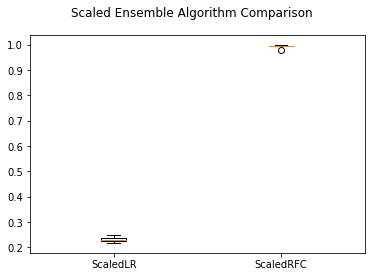

In [ ]:
# ensembles
ensembles = []
ensembles.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])))
ensembles.append(('ScaledRFC', Pipeline([('Scaler', StandardScaler()),('RFC', RandomForestRegressor())])))

results = []
names = []
for name, model in ensembles:
	kfold = KFold(n_splits=10, random_state=123, shuffle=True)
	cv_results = cross_val_score(model, X_train_m5, y_train_m5, cv=kfold, scoring='r2')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# Compare Algorithms
fig = plt.figure()
fig.suptitle('Scaled Ensemble Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### Hyperparameter Tuning

In [ ]:
pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestRegressor(random_state=42))])
# Set grid search params
param_range = [15, 25]



grid_params_rf = [{
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range}] #everything except the first one!


gs_rf = GridSearchCV(estimator=pipe_rf,
    param_grid=grid_params_rf,
    scoring='neg_median_absolute_error',
    cv=10)
grids = [gs_rf]
# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Random Forest Regressor'}

In [ ]:

# Fit the grid search objects
print('Performing model optimizations...')
best_err = np.inf
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(X_train_m5, y_train_m5)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data error
	print('Best training error: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(X_test_m5)
	# Test data error of model with best params
	print('Test set error score for best params: %.3f ' % mean_absolute_error(y_test_m5, y_pred))
	# Track best (lowest test error) model
	if mean_absolute_error(y_test_m5, y_pred) < best_err: #updated: April 8, 2021 (4 PM)
		best_err = mean_absolute_error(y_test_m5, y_pred)
		best_gs = gs
		best_clf = idx
print('\nModel with best test set error: %s' % grid_dict[best_clf])

Performing model optimizations...

Estimator: Random Forest Regressor
Best params: {'clf__max_depth': 25, 'clf__min_samples_leaf': 15}
Best training error: -0.610
Test set error score for best params: 1.735 

Model with best test set error: Random Forest Regressor


In [ ]:
rfc=RandomForestRegressor(max_depth=25,min_samples_leaf=15)
rfc.fit(X_train_m5,y_train_m5)
y_predd=rfc.predict(X_test_m5)
meta_m5_test['preds']=y_predd

### Model-6

In [ ]:
# if it hasn't been already... this is how you install a new module to colab
!pip install tpot

In [ ]:
df=final_df4.copy()
df.drop(columns=['CLASSFP','Decommisioned','res_ratio','bus_ratio','oth_ratio','tot_ratio','TaxReturnsFiled'],inplace=True)
df.drop(columns=['Target'],inplace=True)
df=df.sample(frac=0.02,replace=False,random_state=42)
y=df['Count_EV']
X_train_m6,X_test_m6,y_train_m6,y_test_m6=train_test_split(df,y,test_size=0.2,random_state=3)
meta_m6_train=X_train_m6.iloc[:,1:4]
meta_m6_test=X_test_m6.iloc[:,1:4]

X_train_m6.drop(columns=['ZIP','Fuel Code Type','City','State','Count_EV'],inplace=True)
X_test_m6.drop(columns=['ZIP','Fuel Code Type','City','State','Count_EV'],inplace=True)

In [ ]:
import time
# let's use a regressor instead of a classifier
from tpot import TPOTRegressor

In [ ]:
# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTRegressor(generations=1, verbosity=2, scoring='neg_mean_absolute_error')
tpot.fit(X_train_m6, y_train_m6)
end_time = time.time()

# Results
print('TPOT regressor finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test neg(MAE): %.3f' % tpot.score(X_test_m6, y_test_m6))

# Save best pipeline as Python script file
tpot.export('tpot_Regressor_pipeline.py') # look left!

Optimization Progress:   0%|          | 0/200 [00:00<?, ?pipeline/s]

Exception ignored in: <function Booster.__del__ at 0x7f1993701200>
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/xgboost/core.py", line 1468, in __del__
    _check_call(_LIB.XGBoosterFree(self.handle))
KeyboardInterrupt



Generation 1 - Current best internal CV score: -8.131734659146037

Best pipeline: RandomForestRegressor(StandardScaler(RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.5, min_samples_leaf=5, min_samples_split=5, n_estimators=100)), bootstrap=False, max_features=0.9500000000000001, min_samples_leaf=7, min_samples_split=20, n_estimators=100)
TPOT regressor finished in 264.9754104614258 seconds
Best pipeline test neg(MAE): -7.999


In [ ]:
df=final_df4.copy()
df.drop(columns=['ZIP','State','City','Target'],inplace=True)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LassoLarsCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from tpot.builtins import StackingEstimator
from xgboost import XGBRegressor

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = df
features = tpot_data.drop('Count_EV', axis=1)
training_features, testing_features, training_target, testing_target_r = \
            train_test_split(features, tpot_data['Count_EV'], random_state=None)

# Average CV score on the training set was: -7.856632632748429
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBRegressor(learning_rate=0.5, max_depth=6, min_child_weight=2, n_estimators=100, n_jobs=1, objective="reg:squarederror", subsample=0.9000000000000001, verbosity=0)),
    LassoLarsCV(normalize=False)
)

exported_pipeline.fit(training_features, training_target)
results_r = exported_pipeline.predict(testing_features)


## Error Metrics

### Classification

#### Model-1



In [ ]:
print(classification_report(meta_m1_test['preds'],y_test_m1))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      6661
           1       0.92      0.95      0.93      9093

    accuracy                           0.92     15754
   macro avg       0.92      0.91      0.92     15754
weighted avg       0.92      0.92      0.92     15754



In [ ]:
confusion_matrix(meta_m1_test['preds'],y_test_m1)

array([[5880,  781],
       [ 481, 8612]])

#### Model-2

In [ ]:
print(classification_report(meta_m2_test['preds'],y_test_m2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6366
           1       1.00      1.00      1.00      9388

    accuracy                           1.00     15754
   macro avg       1.00      1.00      1.00     15754
weighted avg       1.00      1.00      1.00     15754



In [ ]:
confusion_matrix(meta_m2_test['preds'],y_test_m2)

array([[6348,   18],
       [  13, 9375]])

#### Model-3

In [ ]:
print(classification_report(results_c,testing_target_c.values))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7890
           1       1.00      1.00      1.00     11802

    accuracy                           1.00     19692
   macro avg       1.00      1.00      1.00     19692
weighted avg       1.00      1.00      1.00     19692



In [ ]:
confusion_matrix(results_c,testing_target_c.values)

array([[ 7890,     0],
       [    0, 11802]])

### Analysis for Classification

AUTOML model is the best with 100% accuracy on both train and test

### Regression

#### Model-4

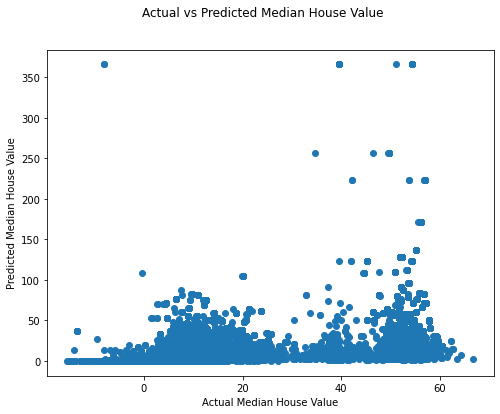

In [ ]:
# Scatterplot to compare the actual and predicted values
plt.figure(figsize=(8, 6))  # Setting the figure size
plt.scatter(x=meta_m4_test['preds'], y=y_test_m4)
plt.axis('tight')
plt.xlabel('Actual Median House Value')   # Setting the xlabel
plt.ylabel('Predicted Median House Value')  # Setting the ylabel 
plt.suptitle('Actual vs Predicted Median House Value') # Setting the suptitle
plt.show()

In [ ]:
print('R2',r2_score(meta_m4_test['preds'],y_test_m4))
print('MAE',mean_absolute_error(meta_m4_test['preds'],y_test_m4))
print('MAPE',mean_absolute_percentage_error(meta_m4_test['preds'],y_test_m4))
print('MSE',mean_squared_error(meta_m4_test['preds'],y_test_m4))


R2 -2.3819365522434572
MAE 14.24254378319967
MAPE 1.0892448051223318
MSE 1077.8102734982333


#### Model-5

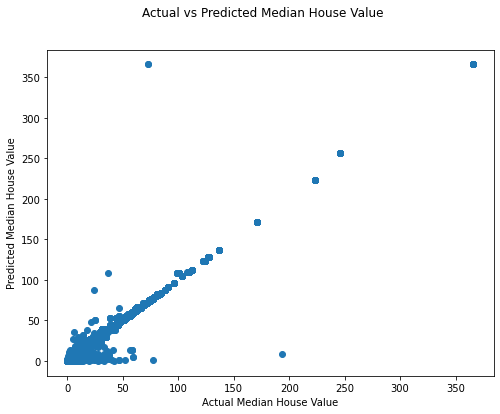

In [ ]:
# Scatterplot to compare the actual and predicted values
plt.figure(figsize=(8, 6))  # Setting the figure size
plt.scatter(x=meta_m5_test['preds'], y=y_test_m5)
plt.axis('tight')
plt.xlabel('Actual Median House Value')   # Setting the xlabel
plt.ylabel('Predicted Median House Value')  # Setting the ylabel 
plt.suptitle('Actual vs Predicted Median House Value') # Setting the suptitle
plt.show()

In [ ]:
print('R2',r2_score(meta_m5_test['preds'],y_test_m5))
print('MAE',mean_absolute_error(meta_m5_test['preds'],y_test_m5))
print('MAPE',mean_absolute_percentage_error(meta_m5_test['preds'],y_test_m5))
print('MSE',mean_squared_error(meta_m5_test['preds'],y_test_m5))

R2 0.9814399323073714
MAE 1.725575241017359
MAPE 0.37134235517034664
MSE 25.27566848002964


#### Model-6

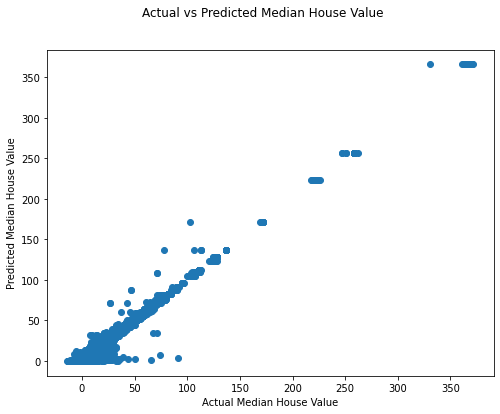

In [ ]:
# Scatterplot to compare the actual and predicted values
plt.figure(figsize=(8, 6))  # Setting the figure size
plt.scatter(x=results_r, y=testing_target_r)
plt.axis('tight')
plt.xlabel('Actual Median House Value')   # Setting the xlabel
plt.ylabel('Predicted Median House Value')  # Setting the ylabel 
plt.suptitle('Actual vs Predicted Median House Value') # Setting the suptitle
plt.show()

In [ ]:
print('R2',r2_score(testing_target_r,results_r))
print('MAE',mean_absolute_error(testing_target_r,results_r))
print('MAPE',mean_absolute_percentage_error(testing_target_r,results_r))
print('MSE',mean_squared_error(testing_target_r,results_r))

R2 0.9904083773618724
MAE 1.9943140476174237
MAPE 1134709977568857.0
MSE 13.317447252902053


## Interpretability

### Permutation Importance

#### Model-1

In [ ]:
df=final_df4.copy()
df.drop(columns=['City','State','ZIP','Target'],inplace=True)

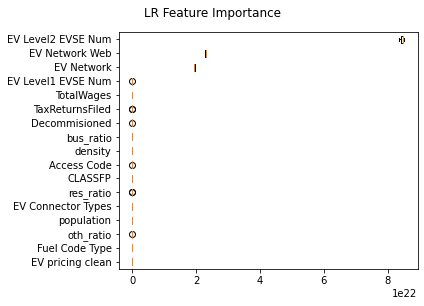

In [ ]:
# it even works for a linear regression!

# let's make this repeatable! all you need to do is assign
# a model object to clf!

clf = lr # don't forget to update title!

result = permutation_importance(clf, X_test_m1, y_test_m1, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
fig.suptitle('LR Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

#### Model-2

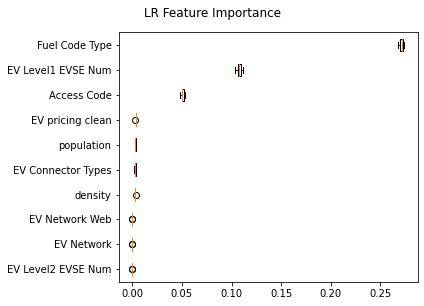

In [ ]:
# it even works for a linear regression!

# let's make this repeatable! all you need to do is assign
# a model object to clf!
rfc=RandomForestClassifier()
rfc.fit(X_train_m2,y_train_m2)
clf = rfc# don't forget to update title!

result = permutation_importance(clf, X_test_m2, y_test_m2, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
fig.suptitle('LR Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

#### Model-3

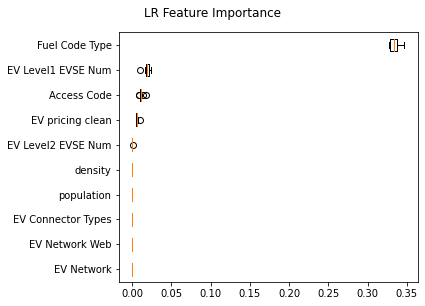

In [ ]:
# it even works for a linear regression!

# let's make this repeatable! all you need to do is assign
# a model object to clf!
gbc=GradientBoostingClassifier()
gbc.fit(X_train_m3,y_train_m3)
clf = gbc # don't forget to update title!

result = permutation_importance(clf, X_test_m3, y_test_m3, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
fig.suptitle('LR Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

### Side by Side Plot

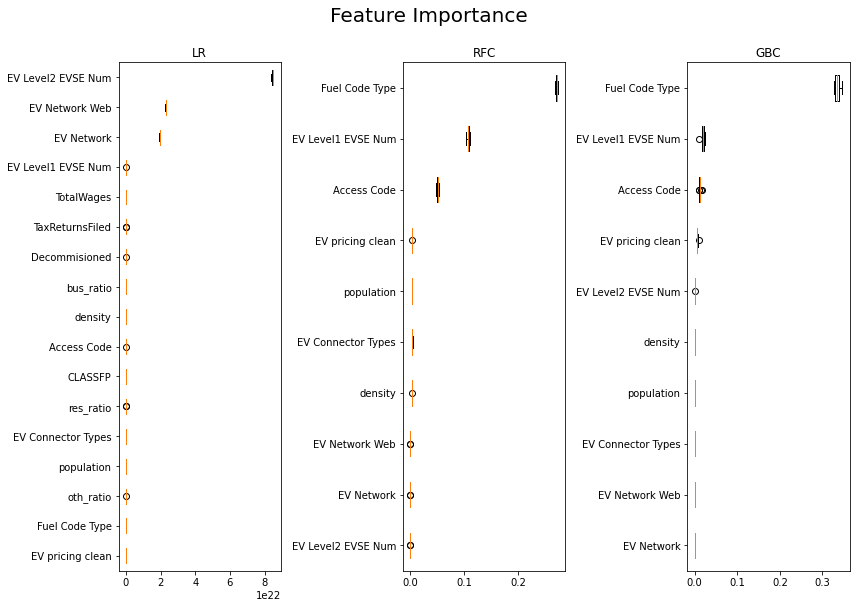

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8)) # 1 row, 3 columns
plt.suptitle('Feature Importance', y= 1.05, size = 20)
# LR
clf = lr # don't forget to update title!
result = permutation_importance(clf, X_test_m1, y_test_m1, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
ax1.set_title('LR')

# DTR
clf = rfc # don't forget to update title!
result = permutation_importance(clf, X_test_m2, y_test_m2, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
ax2.set_title('RFC')

# RFR
clf = gbc # don't forget to update title!
result = permutation_importance(clf, X_test_m3, y_test_m3, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

ax3.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
ax3.set_title('GBC')

fig.tight_layout()
plt.show()

### Model-4

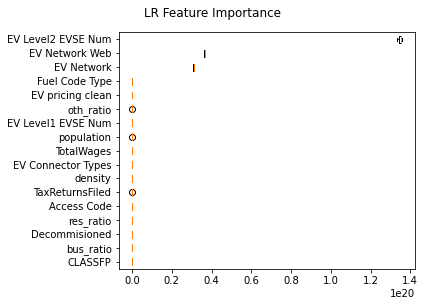

In [ ]:

# it even works for a linear regression!

# let's make this repeatable! all you need to do is assign
# a model object to clf!

clf = lr # don't forget to update title!

result = permutation_importance(clf, X_test_m4, y_test_m4, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
fig.suptitle('LR Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

### Model-5

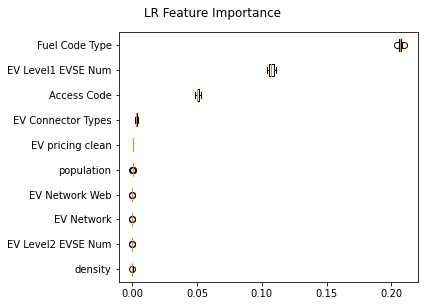

In [ ]:

# it even works for a linear regression!

# let's make this repeatable! all you need to do is assign
# a model object to clf!

clf = rfc # don't forget to update title!

result = permutation_importance(clf, X_test_m5, y_test_m5, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
fig.suptitle('LR Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

### Model-6

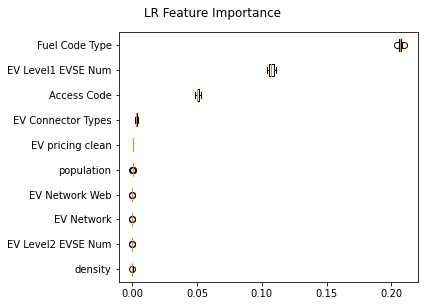

In [ ]:

# it even works for a linear regression!

# let's make this repeatable! all you need to do is assign
# a model object to clf!

clf = rfc # don't forget to update title!

result = permutation_importance(clf, X_test_m5, y_test_m5, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4))
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
fig.suptitle('LR Feature Importance', y=1.05) # don't forget to update title!
fig.tight_layout()
plt.show()

### Side by Side plots

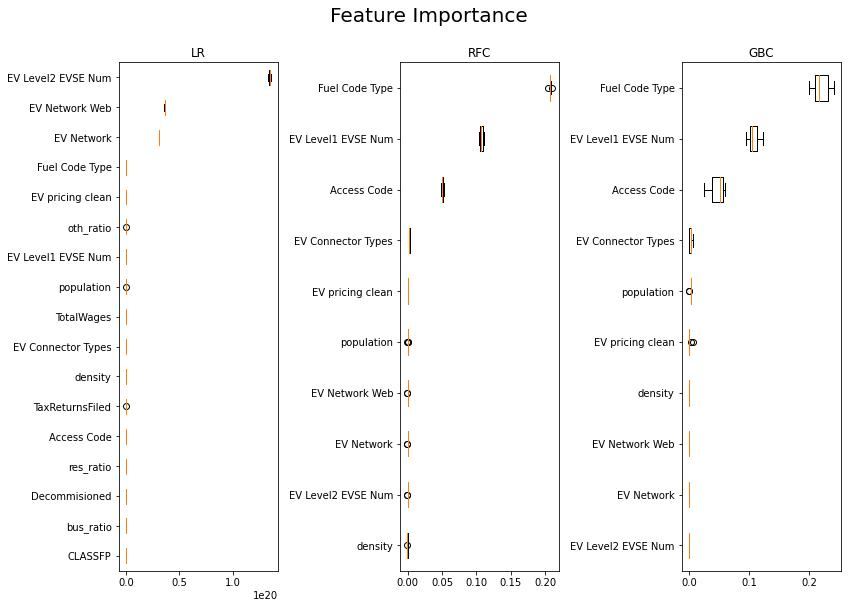

In [ ]:
# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 8)) # 1 row, 3 columns
plt.suptitle('Feature Importance', y= 1.05, size = 20)
# LR
clf = lr # don't forget to update title!
result = permutation_importance(clf, X_test_m4, y_test_m4, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
ax1.set_title('LR')

# DTR
clf = rfc # don't forget to update title!
result = permutation_importance(clf, X_test_m5, y_test_m5, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
ax2.set_title('RFC')

# RFR
clf = rfc # don't forget to update title!
result = permutation_importance(clf, X_test_m6, y_test_m6, n_repeats=10,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

ax3.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=df.columns[perm_sorted_idx])
ax3.set_title('GBC')

fig.tight_layout()
plt.show()

### Partial Dependence Plots

In [ ]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot

     |████████████████████████████████| 14.2 MB 12.3 MB/s 
  Created wheel for pycebox: filename=pycebox-0.0.1-py3-none-any.whl size=3640 sha256=cedabd06feda733800a49c887d02be376768ea51b916d4b1bb14fc71d1cc9450
  Stored in directory: /root/.cache/pip/wheels/cc/0d/0a/06236a41d8f5c3485c1057262de55329e227a0c239fd00d0cd
Successfully built pycebox


### Model-1

In [ ]:
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=2, 
                  ncols=5, figsize=(24, 14), sharex=False, sharey=True,
                  num_grid_points = 10, # DW added this on 4/27/2022! 
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

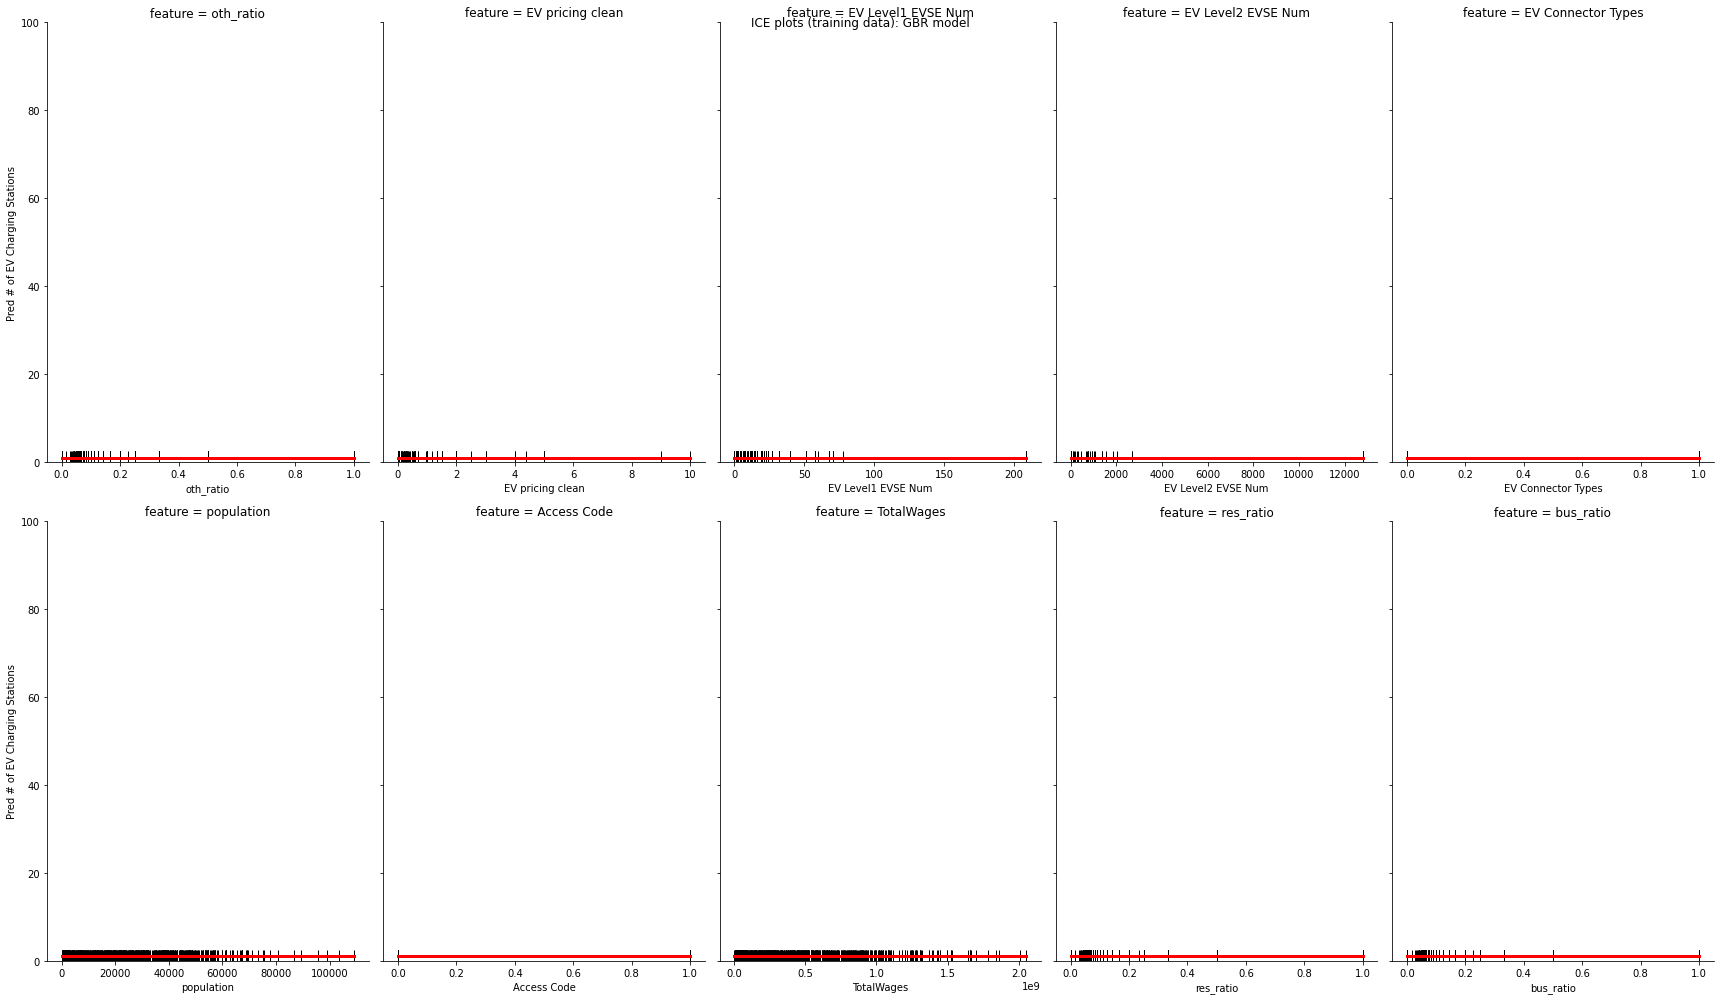

In [ ]:
df=final_df4.copy()
df.drop(columns=['ZIP','Fuel Code Type','City','State','Count_EV'],inplace=True)
df_top10=df[['oth_ratio','EV pricing clean','EV Level1 EVSE Num',
    'EV Level2 EVSE Num','EV Connector Types','population','Access Code',
    'TotalWages','res_ratio','bus_ratio','Target']]
df_top10 = df_top10.sample(frac=0.01, random_state=1)
y=df_top10['Target']
df_top10=df_top10.drop(columns=['Target'])

# columns to plot
features = df_top10.columns
model_lr = LogisticRegression()
model_lr.fit(df_top10, y)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=df_top10, column=feat, predict=model_lr.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, df_top10, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,100]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

### Model-2

In [ ]:
final_df4.columns

Index(['Fuel Code Type', 'City', 'State', 'ZIP', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV Network', 'EV Network Web',
       'EV Connector Types', 'Access Code', 'EV pricing clean', 'population',
       'density', 'CLASSFP', 'Decommisioned', 'TotalWages', 'TaxReturnsFiled',
       'res_ratio', 'bus_ratio', 'oth_ratio', 'tot_ratio', 'Target',
       'Count_EV'],
      dtype='object')

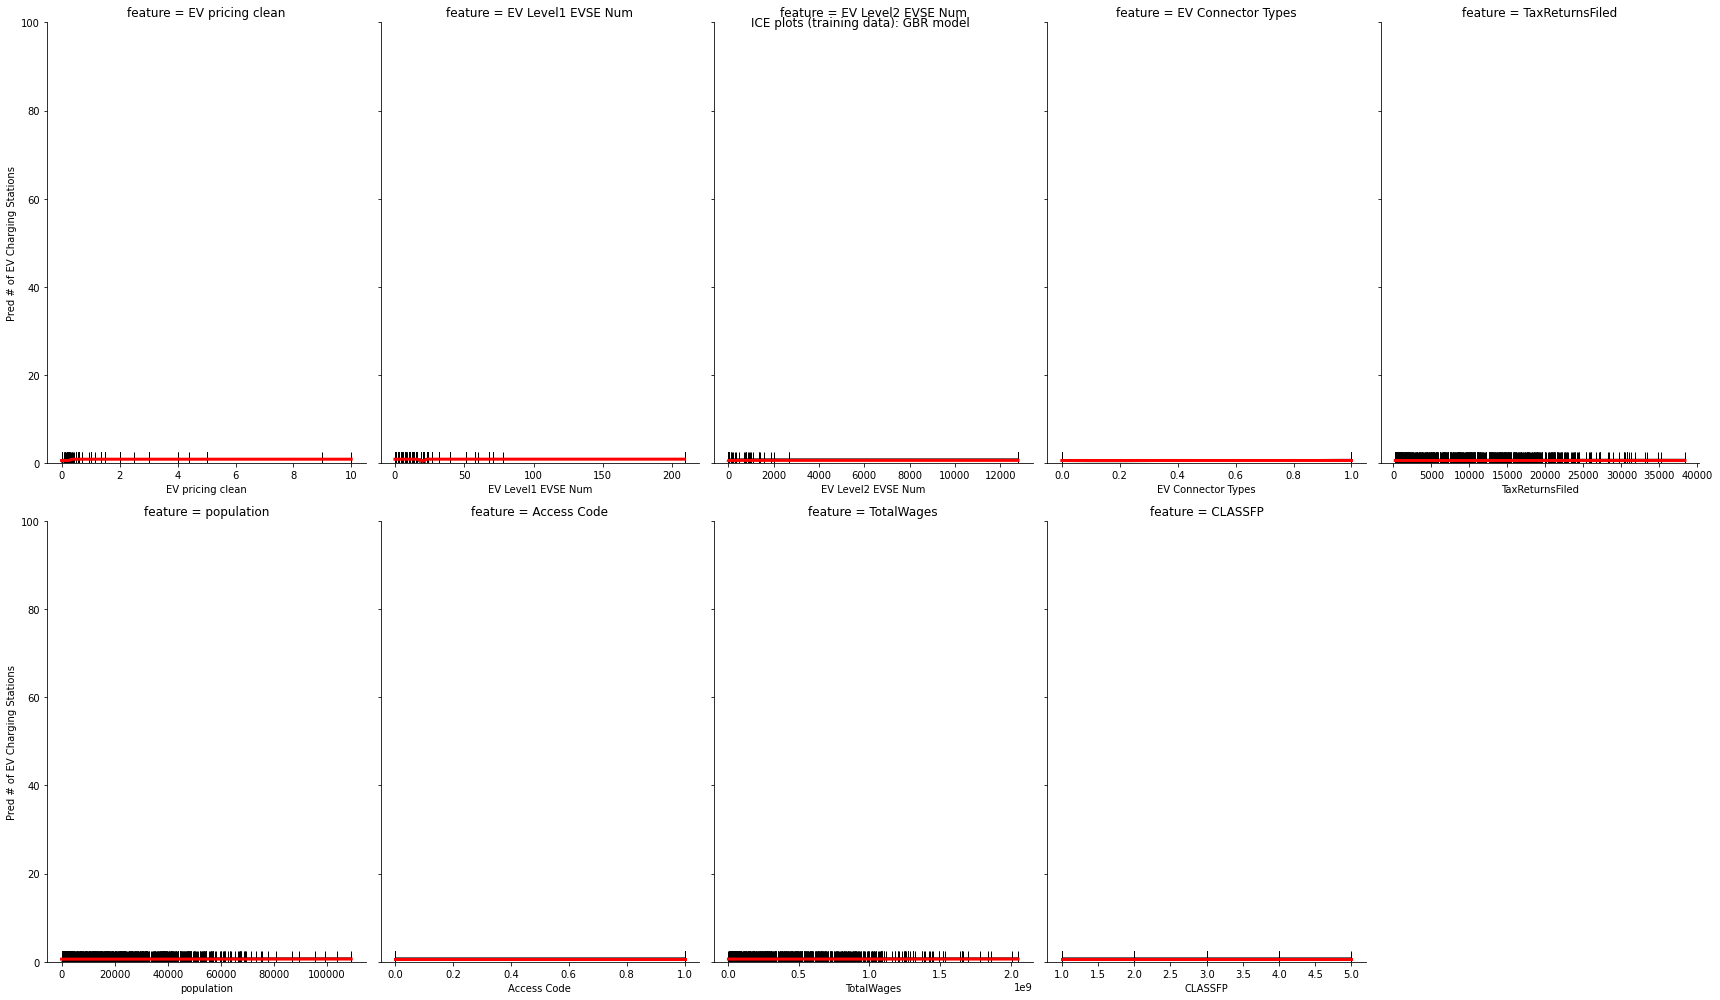

In [ ]:
df=final_df4.copy()
df.drop(columns=['ZIP','Fuel Code Type','City','State','Count_EV'],inplace=True)
df_top10=df[['EV pricing clean','EV Level1 EVSE Num',
    'EV Level2 EVSE Num','EV Connector Types','TaxReturnsFiled','population','Access Code',
    'TotalWages','CLASSFP','Target']]
df_top10 = df_top10.sample(frac=0.01, random_state=1)
y=df_top10['Target']
df_top10=df_top10.drop(columns=['Target'])

# columns to plot
features = df_top10.columns
model_lr = RandomForestClassifier()
model_lr.fit(df_top10, y)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=df_top10, column=feat, predict=model_lr.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, df_top10, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,100]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

### Model-3

In [ ]:
final_df4.columns

Index(['Fuel Code Type', 'City', 'State', 'ZIP', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV Network', 'EV Network Web',
       'EV Connector Types', 'Access Code', 'EV pricing clean', 'population',
       'density', 'CLASSFP', 'Decommisioned', 'TotalWages', 'TaxReturnsFiled',
       'res_ratio', 'bus_ratio', 'oth_ratio', 'tot_ratio', 'Target',
       'Count_EV'],
      dtype='object')

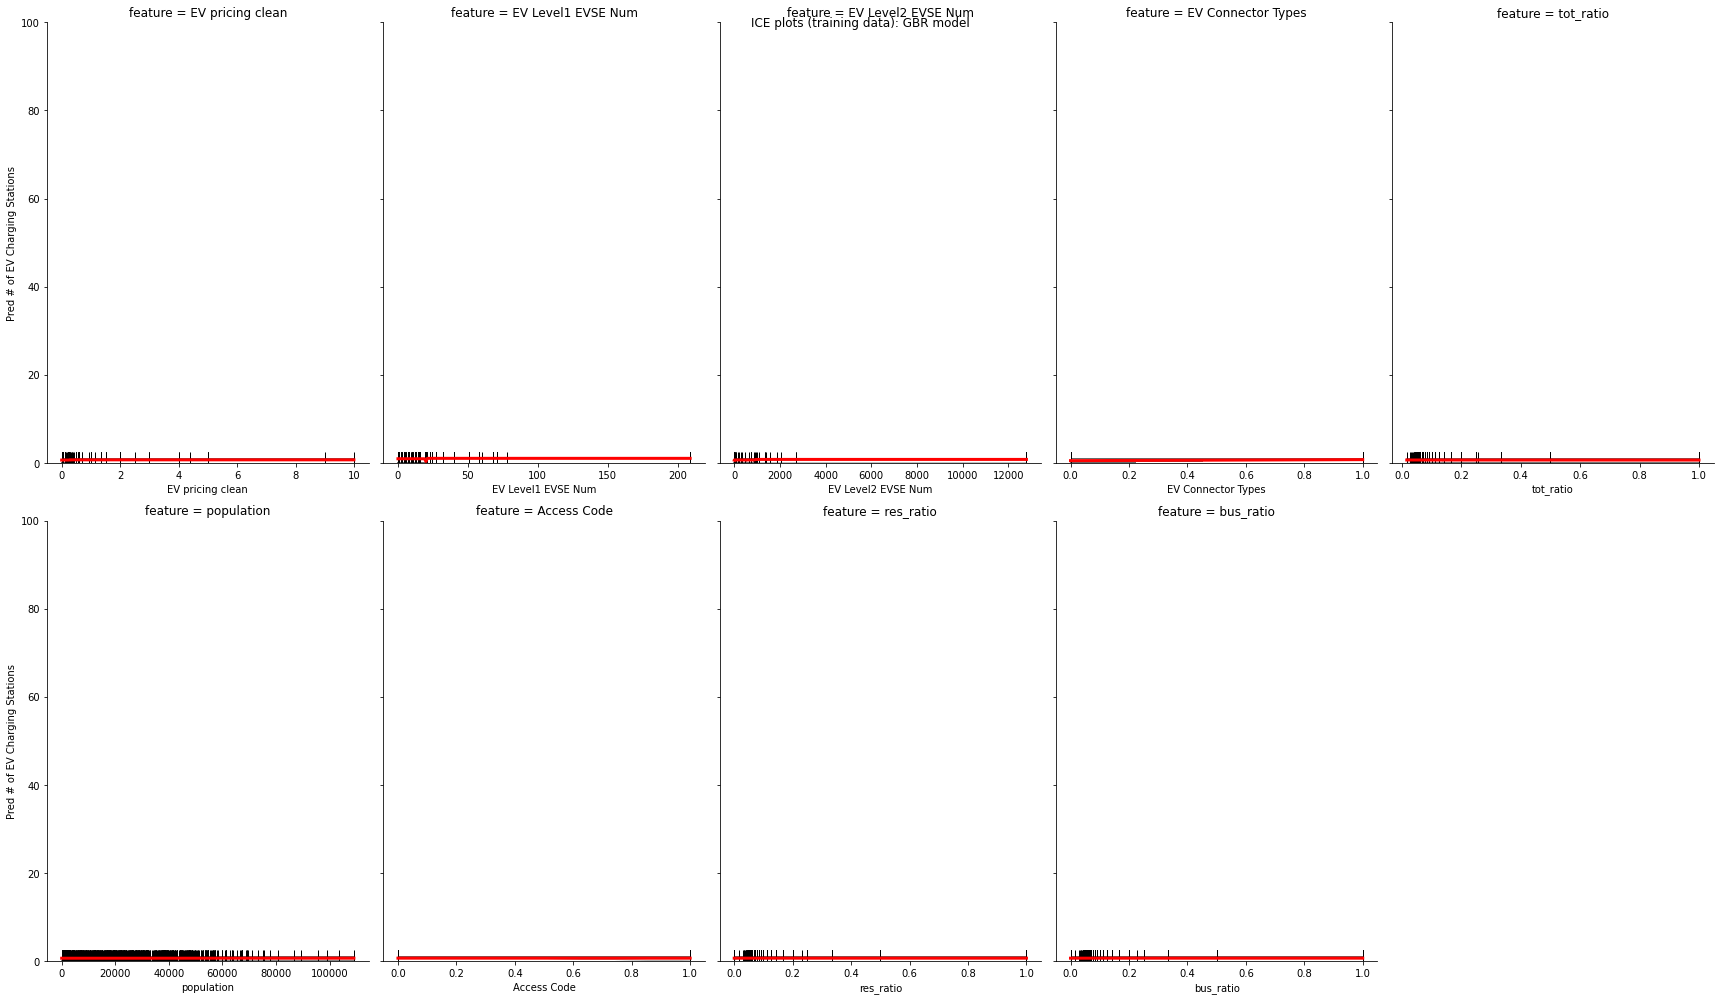

In [ ]:
df=final_df4.copy()
df.drop(columns=['ZIP','Fuel Code Type','City','State','Count_EV'],inplace=True)
df_top10=df[['EV pricing clean','EV Level1 EVSE Num',
    'EV Level2 EVSE Num','EV Connector Types','tot_ratio','population','Access Code',
    'res_ratio','bus_ratio','Target']]
df_top10 = df_top10.sample(frac=0.01, random_state=1)
y=df_top10['Target']
df_top10=df_top10.drop(columns=['Target'])

# columns to plot
features = df_top10.columns
model_lr = GradientBoostingClassifier()
model_lr.fit(df_top10, y)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=df_top10, column=feat, predict=model_lr.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, df_top10, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,100]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

### Model-4

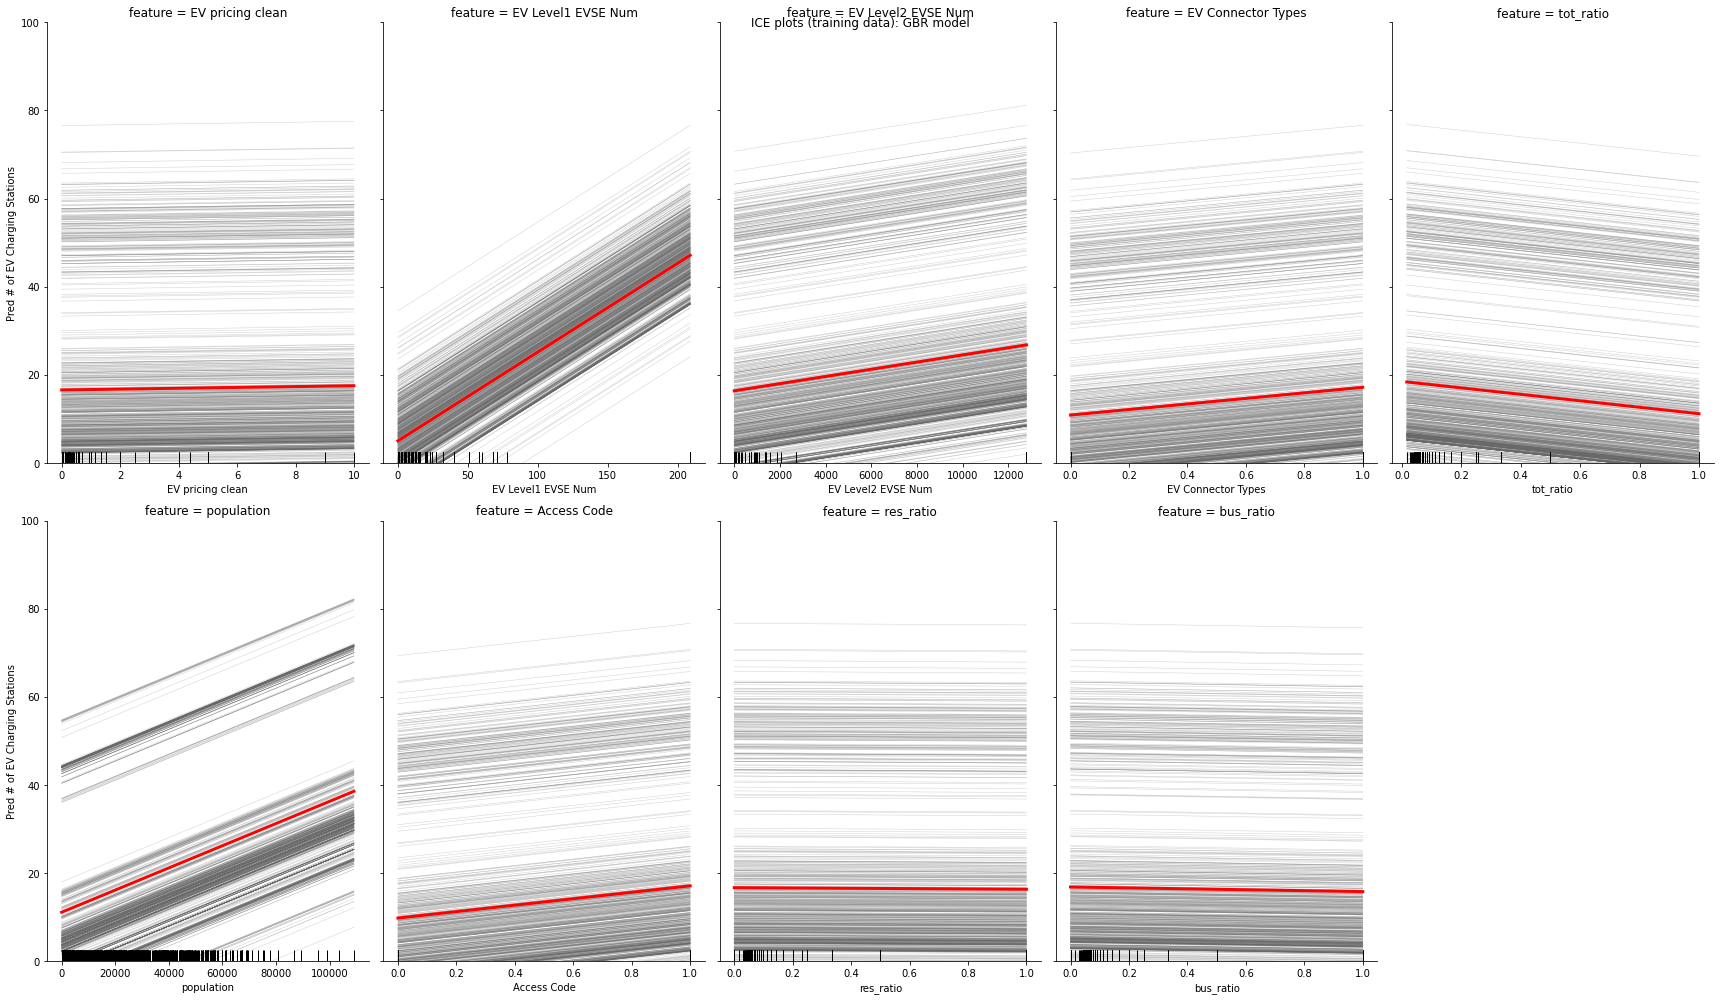

In [ ]:
df=final_df4.copy()
df.drop(columns=['ZIP','Fuel Code Type','City','State','Target'],inplace=True)
df_top10=df[['EV pricing clean','EV Level1 EVSE Num',
    'EV Level2 EVSE Num','EV Connector Types','tot_ratio','population','Access Code',
    'res_ratio','bus_ratio','Count_EV']]
df_top10 = df_top10.sample(frac=0.01, random_state=1)
y=df_top10['Count_EV']
df_top10=df_top10.drop(columns=['Count_EV'])

# columns to plot
features = df_top10.columns
model_lr = LinearRegression()
model_lr.fit(df_top10, y)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=df_top10, column=feat, predict=model_lr.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, df_top10, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,100]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

### Model-5

In [ ]:
final_df4.columns

Index(['Fuel Code Type', 'City', 'State', 'ZIP', 'EV Level1 EVSE Num',
       'EV Level2 EVSE Num', 'EV Network', 'EV Network Web',
       'EV Connector Types', 'Access Code', 'EV pricing clean', 'population',
       'density', 'CLASSFP', 'Decommisioned', 'TotalWages', 'TaxReturnsFiled',
       'res_ratio', 'bus_ratio', 'oth_ratio', 'tot_ratio', 'Target',
       'Count_EV'],
      dtype='object')

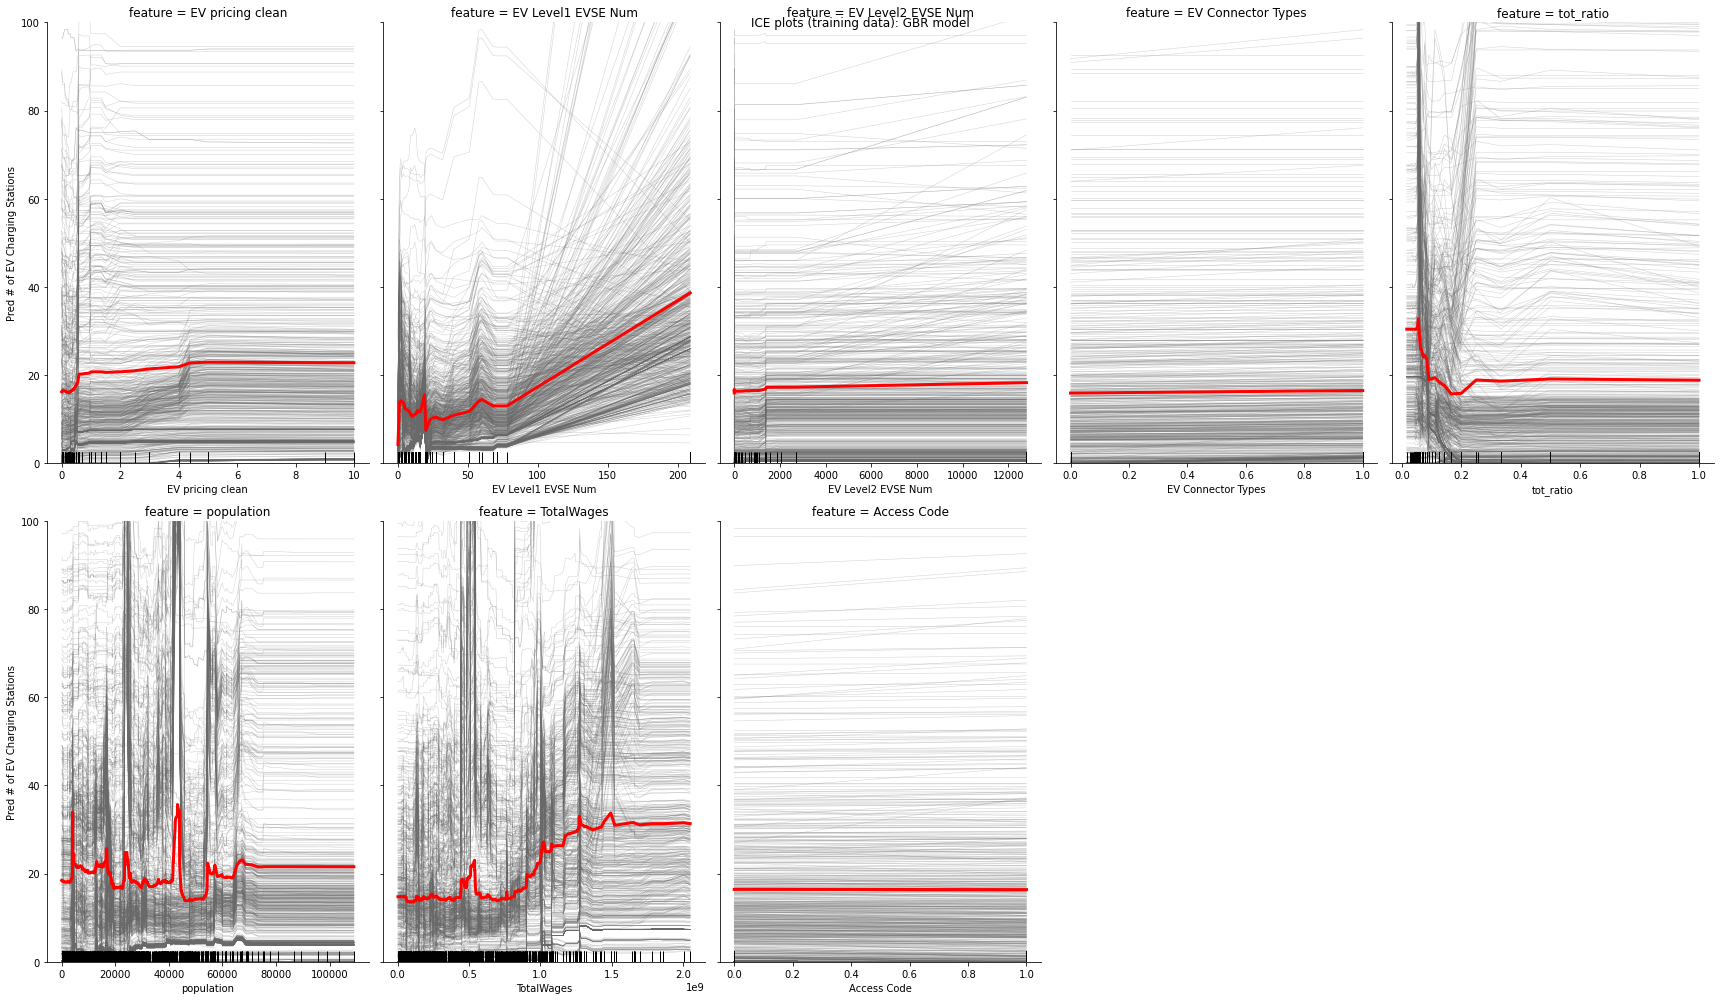

In [ ]:
df=final_df4.copy()
df.drop(columns=['ZIP','Fuel Code Type','City','State','Target'],inplace=True)
df_top10=df[['EV pricing clean','EV Level1 EVSE Num',
    'EV Level2 EVSE Num','EV Connector Types','tot_ratio','population','TotalWages','Access Code','Count_EV']]
df_top10 = df_top10.sample(frac=0.01, random_state=1)
y=df_top10['Count_EV']
df_top10=df_top10.drop(columns=['Count_EV'])

# columns to plot
features = df_top10.columns
model_lr = RandomForestRegressor()
model_lr.fit(df_top10, y)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=df_top10, column=feat, predict=model_lr.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, df_top10, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,100]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

### Model-6

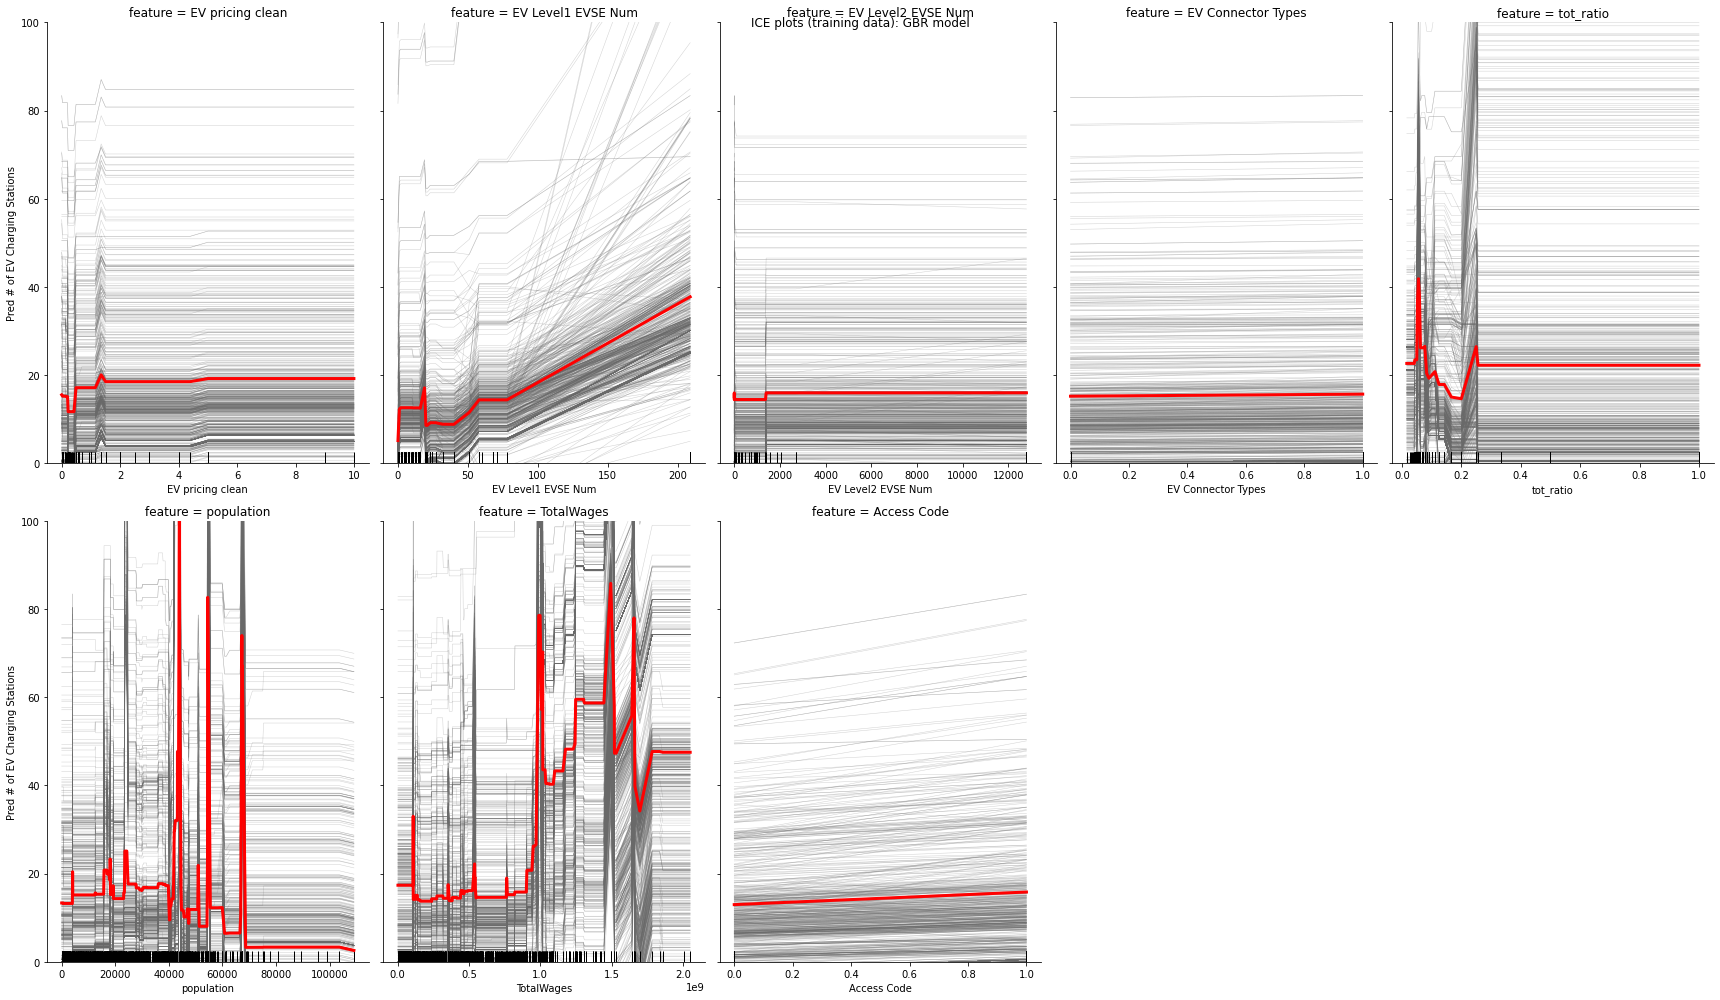

In [ ]:
df=final_df4.copy()
df.drop(columns=['ZIP','Fuel Code Type','City','State','Target'],inplace=True)
df_top10=df[['EV pricing clean','EV Level1 EVSE Num',
    'EV Level2 EVSE Num','EV Connector Types','tot_ratio','population','TotalWages','Access Code','Count_EV']]
df_top10 = df_top10.sample(frac=0.01, random_state=1)
y=df_top10['Count_EV']
df_top10=df_top10.drop(columns=['Count_EV'])

# columns to plot
features = df_top10.columns
model_lr = GradientBoostingRegressor()
model_lr.fit(df_top10, y)
# creating dictionary of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=df_top10, column=feat, predict=model_lr.predict) 
                 for feat in features}

plot_ice_grid(train_ice_dfs, df_top10, features,
                    ax_ylabel='Pred # of EV Charging Stations', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,100]) # setting y limits
plt.suptitle('ICE plots (training data): GBR model')
plt.tight_layout()

# Conclusion

To sum it all up, in this project we tried to provide details about which cities and states have the highest number of EV Charging stations with the help of plots and tables. Gradient Boosting, Random Forest with hyperparameter tuning alongside autoML models were implemented. Furthermore, for model interpretability we created partial dependency plots and permutation feature importance plots. From these, features like Type of Fuel (ELEC vs NON-ELEC) and EV Pricing were among the ones found consistently on top across all the models. And that does make sense! The future is electric, but affordability stays the topmost priority for the people.

By investing in EV infrastructure, the US has the chance to not only reduce environmental and healthcare costs from air pollution but also deliver economic growth through job creation. Ultimately, this project helped us analyze the need to setup more EV Charging Stations and also helped establish specific regions to focus on.
